# FYP - Investigation of Visual Bias in Generative AI

### Libraries 

Below is a list of all the libraries used throughout the notebook


In [1]:
import numpy as np
import cv2
import requests
import pandas as pd
import glob
import requests
from io import BytesIO
from IPython.display import Image, display
from clip_retrieval.clip_client import ClipClient, Modality
from matplotlib import pyplot as plt
from deepface import DeepFace
from PIL import Image

### Loading the dataset

The FairFace dataset is used to facilitate the comparison of the the DeepFace, Inferdo & BetaFace APIs. This dataset can either be loaded/stored locally utiling the code below however it was decided to load only the first 100 images via links so as to allow the notebook to be used without requiring the dataset. The data set can be found from the following link: https://www.kaggle.com/datasets/lantian773030/fairface?resource=download 

In [2]:
# # Specifying the image folder path
# folder_path = 'FairFace/train/'  

# # Retrieving a list of all image file paths in the folder
# image_paths = glob.glob(folder_path)

# # Iterating over each image path and loading the images
# images = []

# no_of_images = 100

# for index in range(1, no_of_images):
#     image = cv2.imread(folder_path+str(index)+".jpg")
#     if image is not None:
#         images.append(image[:,:,::-1])
#     else:
#         print(f"Failed to load image: {image_paths[image_path]}")

#### Loading first 100 images of the dataset via link format

In [3]:
# Unorderd list of first 100 images in the dataset in url form, this was carried out using https://postimg.cc/gallery/nxY6KQ7/dda9d683
imgUrl = [
"https://i.postimg.cc/N0f1ZmZp/1.jpg",
"https://i.postimg.cc/KYzM0FgW/10.jpg",
"https://i.postimg.cc/dQTSWc2D/100.jpg",
"https://i.postimg.cc/bvB2MMxw/11.jpg",
"https://i.postimg.cc/Hx87C2z4/12.jpg",
"https://i.postimg.cc/nrvjXh6X/13.jpg",   
"https://i.postimg.cc/j2Vnq7kV/14.jpg",
"https://i.postimg.cc/2jvBc0VC/15.jpg",
"https://i.postimg.cc/ZKSv16dp/16.jpg",
"https://i.postimg.cc/WbwqjtGK/17.jpg",
"https://i.postimg.cc/tgYsh5KQ/18.jpg",
"https://i.postimg.cc/CKXzJ80Z/19.jpg",
"https://i.postimg.cc/2yvvnwB8/2.jpg",
"https://i.postimg.cc/63ZTPQ6M/20.jpg",
"https://i.postimg.cc/T1XhvXpf/21.jpg",
"https://i.postimg.cc/4ybyJF9t/22.jpg",
"https://i.postimg.cc/tRhYt7MT/23.jpg",
"https://i.postimg.cc/fTCyppZQ/24.jpg",
"https://i.postimg.cc/kg5GmsX6/25.jpg",
"https://i.postimg.cc/7ZQ6YzfB/26.jpg",
"https://i.postimg.cc/BvLv8vFJ/27.jpg",
"https://i.postimg.cc/GpWmv1PG/28.jpg",
"https://i.postimg.cc/0Q72fHZ3/29.jpg",
"https://i.postimg.cc/C19kZt5Q/3.jpg",
"https://i.postimg.cc/hvg43b5G/30.jpg",
"https://i.postimg.cc/zvjDmbsF/31.jpg",
"https://i.postimg.cc/J7czHvsH/32.jpg",
"https://i.postimg.cc/Dyvyr6Gj/33.jpg",
"https://i.postimg.cc/gkgcNhqY/34.jpg",
"https://i.postimg.cc/mghLqr87/35.jpg",
"https://i.postimg.cc/6Qv9Wms3/36.jpg",
"https://i.postimg.cc/Z5gbhhM2/37.jpg",
"https://i.postimg.cc/Qtgh5KdZ/38.jpg",
"https://i.postimg.cc/5yx1m9XY/39.jpg",
"https://i.postimg.cc/JnsjzmrX/4.jpg",
"https://i.postimg.cc/D0BhpVGC/40.jpg",
"https://i.postimg.cc/kMc7gSHx/41.jpg",
"https://i.postimg.cc/7YZwG6vj/42.jpg",
"https://i.postimg.cc/J4YmbLM0/43.jpg",
"https://i.postimg.cc/T3yx0439/44.jpg",
"https://i.postimg.cc/9QvhnY4j/45.jpg",
"https://i.postimg.cc/fbmNnSXS/46.jpg",
"https://i.postimg.cc/xCQS0jyx/47.jpg",
"https://i.postimg.cc/63hxTsM9/48.jpg",
"https://i.postimg.cc/Pf2kjjLy/49.jpg",
"https://i.postimg.cc/c18Qqs5y/5.jpg",
"https://i.postimg.cc/0jWgdYgF/50.jpg",
"https://i.postimg.cc/QML2bNP8/51.jpg",
"https://i.postimg.cc/FHJt3kTC/52.jpg",
"https://i.postimg.cc/jd10D44J/53.jpg",
"https://i.postimg.cc/m2kWZ5Cs/54.jpg",
"https://i.postimg.cc/q789ZVV8/55.jpg",
"https://i.postimg.cc/85Nx2KNx/56.jpg",
"https://i.postimg.cc/nz2Np4Lr/57.jpg",
"https://i.postimg.cc/qq7SRNtL/58.jpg",
"https://i.postimg.cc/hv3w7KTq/59.jpg",
"https://i.postimg.cc/MK21qhhc/6.jpg",
"https://i.postimg.cc/SNJHbzbQ/60.jpg",
"https://i.postimg.cc/jq8B149k/61.jpg",
"https://i.postimg.cc/RVyySVv7/62.jpg",
"https://i.postimg.cc/2SWJVR5P/63.jpg",
"https://i.postimg.cc/vmdKnqgD/64.jpg",
"https://i.postimg.cc/nLYPG4B2/65.jpg",
"https://i.postimg.cc/zBzPtykr/66.jpg",
"https://i.postimg.cc/TwtNZTkW/67.jpg",
"https://i.postimg.cc/x8qpQB7p/68.jpg",
"https://i.postimg.cc/KjVq8JhG/69.jpg",
"https://i.postimg.cc/RZGt1qqf/7.jpg",
"https://i.postimg.cc/v8SShHgJ/70.jpg",
"https://i.postimg.cc/yYgpb40k/71.jpg",
"https://i.postimg.cc/bN7VXCRL/72.jpg",
"https://i.postimg.cc/bw1CqxCP/73.jpg",
"https://i.postimg.cc/0NxtjzFw/74.jpg",
"https://i.postimg.cc/Tw3CjZR2/75.jpg",
"https://i.postimg.cc/q7L13kHZ/76.jpg",
"https://i.postimg.cc/j2WcmPwG/77.jpg",
"https://i.postimg.cc/mDpVm8DY/78.jpg",
"https://i.postimg.cc/kGksmGWD/79.jpg",
"https://i.postimg.cc/bwqb21Yp/8.jpg",
"https://i.postimg.cc/jq9ZNgBK/80.jpg",
"https://i.postimg.cc/XY6L1ZVz/81.jpg",
"https://i.postimg.cc/KvMQ57yT/82.jpg",
"https://i.postimg.cc/y8hPMVxY/83.jpg",
"https://i.postimg.cc/Dz2gFt4Q/84.jpg",
"https://i.postimg.cc/mr8Sr87v/85.jpg",
"https://i.postimg.cc/Y90zLY3h/86.jpg",
"https://i.postimg.cc/HxN4wnZ3/87.jpg",
"https://i.postimg.cc/XqyKQWtW/88.jpg",
"https://i.postimg.cc/MpYLy0yD/89.jpg",
"https://i.postimg.cc/RV7KFgBg/9.jpg",
"https://i.postimg.cc/nMb4W5tD/90.jpg",
"https://i.postimg.cc/MZcghQS6/91.jpg",
"https://i.postimg.cc/44rjZxfz/92.jpg",
"https://i.postimg.cc/52JGYKFy/93.jpg",
"https://i.postimg.cc/pdX6k9Ct/94.jpg",
"https://i.postimg.cc/fTmpbQy1/95.jpg",
"https://i.postimg.cc/XvHDPV1B/96.jpg",
"https://i.postimg.cc/W3dfLQxW/97.jpg",
"https://i.postimg.cc/XJt1VsbV/98.jpg",
"https://i.postimg.cc/fyX2kYzY/99.jpg"]

# Defining a custom key function to extract the JPG names from the URLs
def extract_jpg_name(url):
    return int(url.split('/')[-1].split('.')[0])

# Sorting the images based on the name
imgUrl = sorted(imgUrl, key=extract_jpg_name)

# Testing different Facial detectors/classifiers

The section below implements the DeepFace, Inferdo & BetaFace APIs on the aformentioned 100 images. This is done to facilitate comparison of outputs with the dataset groundTruths, therby coming to a conclusion as to which API is best out of the three.

## DeepFace

The DeepFace API can be found from the following link: https://github.com/serengil/deepface. The implementation itself follows the guide present on the APIs github page found through the same link.

In [4]:
# Required installs 
# pip install deepface

# Required imports
# from deepface import DeepFace

In [5]:
# Function which carries out the DeepFace API on the provided list of images
def DeepFaceProcess(listOfImages):
    # Dict used to store the images alongside their data
    DeepFaceDict = {}
    # Counter used to keep track of the dictionary position 
    counter = 0
    
    # Looping through the list of images
    for imgIndex in range(len(listOfImages)):
        try:
            # Retrieving the age/gender/race/emotion of the image
            # Note: enforce_detection=False used so that images where the face isn't fully visible are still considered
            objs = DeepFace.analyze(listOfImages[imgIndex], actions = ['age', 'gender', 'race', 'emotion'], enforce_detection=False)

            ImageInfo = {'age':objs[0]['age'], 'gender':objs[0]['dominant_gender'], 'race':objs[0]['dominant_race'], 'emotion':objs[0]['dominant_emotion']}

            # Send a GET request to the URL and retrieving the image data
            response = requests.get(listOfImages[imgIndex])
            image_data = response.content

            # Converting the image to matrix form
            img = np.array(Image.open(BytesIO(image_data)))

            # Storing the images in a dictionary 
            DeepFaceDict[counter] = [img,ImageInfo]
            counter+=1
        except:
            counter-=1
            print("Error: Image failed to be processed")
        
    return DeepFaceDict

In [6]:
# Function used to display the images alongside their relevant data
def ImageInfoDisplay(imageDict):
    for itemIndex in range(len(imageDict.items())):
        plt.imshow(imageDict[itemIndex][0], interpolation='nearest', cmap="gray")
        plt.axis("Off")
        text = ""
        
        # Determining the data to display based on the API used
        if 'age' in imageDict[itemIndex][1]:
            text += "Age: " + str(imageDict[itemIndex][1]['age'])
        
        if 'gender' in imageDict[itemIndex][1]:
            text += "\nGender: " + str(imageDict[itemIndex][1]['gender'])
            
        if 'race' in imageDict[itemIndex][1]:
            text += "\nRace: " + str(imageDict[itemIndex][1]['race'])
            
        if 'emotion' in imageDict[itemIndex][1]:
            text += "\nEmotion:" + str(imageDict[itemIndex][1]['emotion'])
        
        plt.text(0, imageDict[itemIndex][0].shape[0]-10, text, color='red')
        plt.show()

Action: emotion: 100%|██████████| 4/4 [00:00<00:00,  7.27it/s]


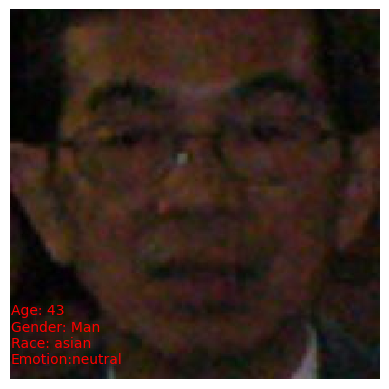

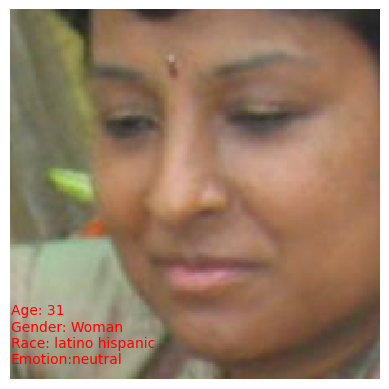

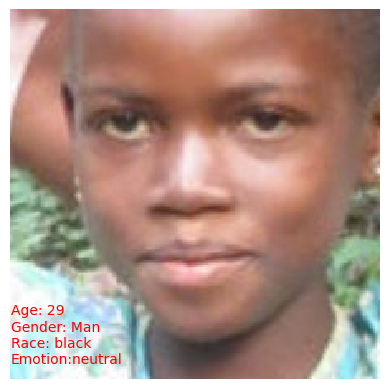

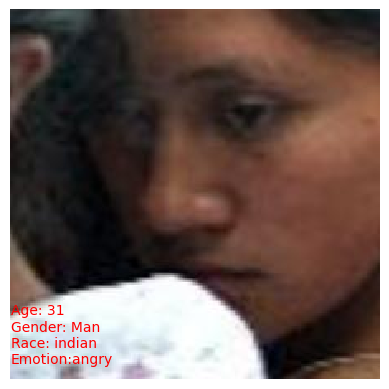

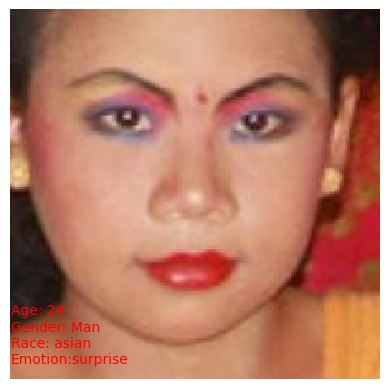

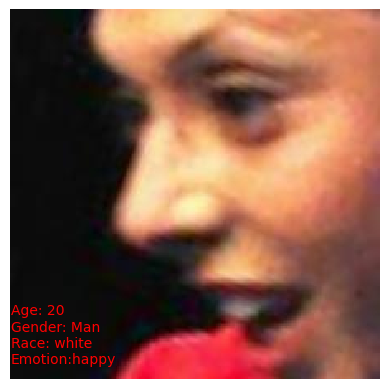

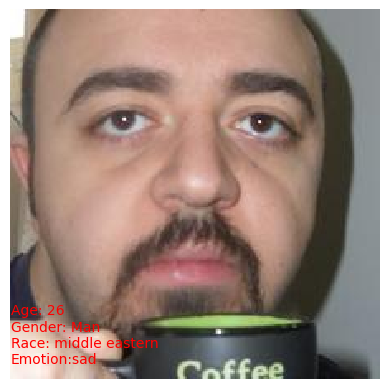

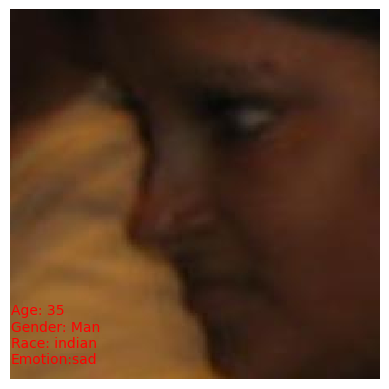

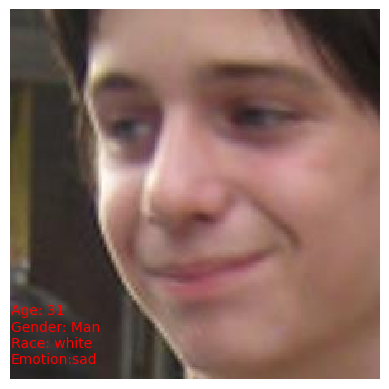

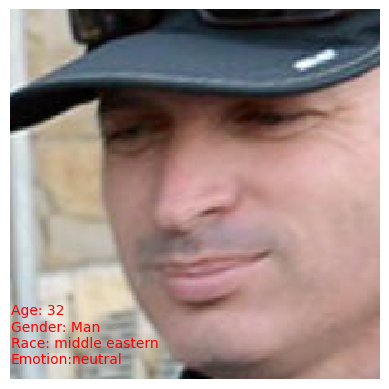

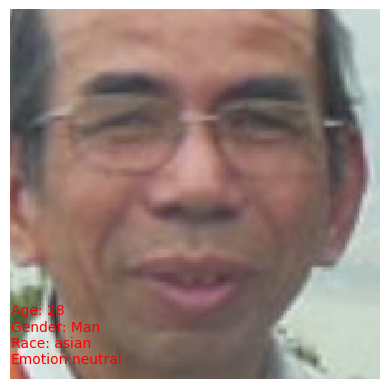

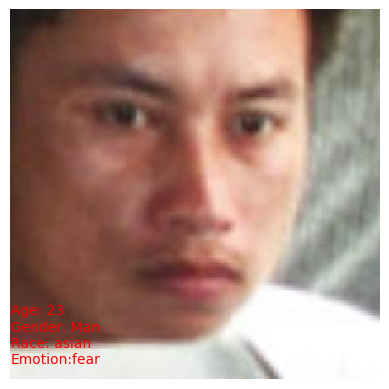

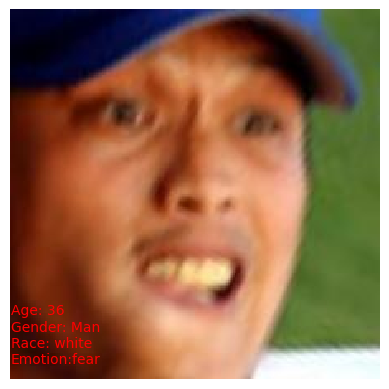

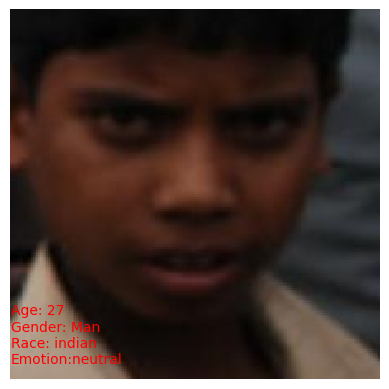

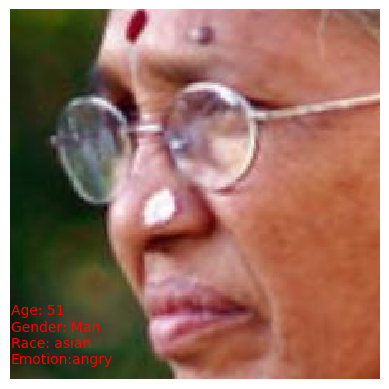

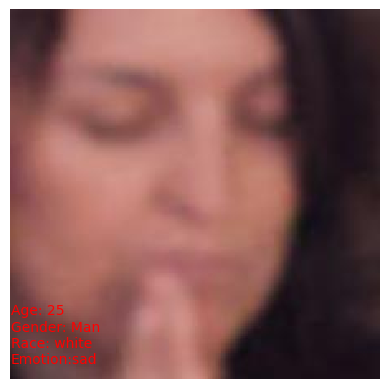

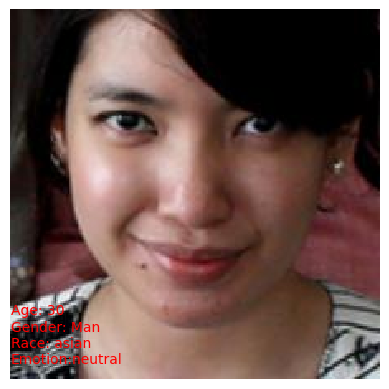

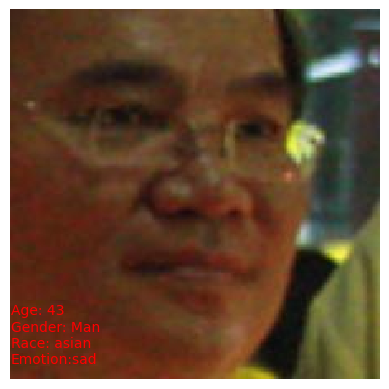

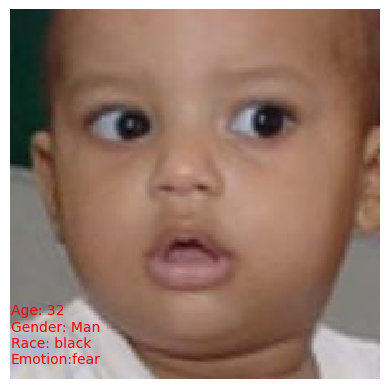

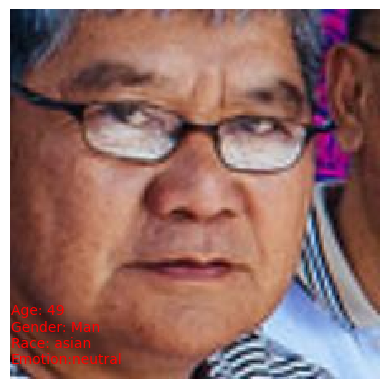

In [7]:
DeepFaceDict = DeepFaceProcess(imgUrl[0:20])

# Displaying the DeepFace processed images
ImageInfoDisplay(DeepFaceDict)

## Inferdo API

The DeepFace API can be found from the following link: https://inferdo.com/. The implementation itself follows the guide present on the following webpage: https://rapidapi.com/inferdo/api/face-detection6.

In [8]:
# Required installs 
# pip install requests

# Required imports
# import requests
# from PIL import Image
# from io import BytesIO

In [9]:
# Function which carries out the Inferdo API on the provided list of images
def InferdoAPIProcess(imgUrls, accuracyLvl):
    # Dict used to store the images alongside their data
    InferdoAPIDict = {}
    
    # Specifying the required input data for the API
    url = "https://face-detection6.p.rapidapi.com/img/face-age-gender"
    
    headers = {
        "content-type": "application/json",
        "X-RapidAPI-Key": "2e915f0481msh738a16bbbadc6a5p1e4925jsn86a91ba9e1fd",
        "X-RapidAPI-Host": "face-detection6.p.rapidapi.com"
    }
    
    # Looping through all the image urls
    for imgIndex in range(len(imgUrls)):
        
        # Url denotes the image url to be processed & accuracy_boost denotes the accuracy that the API will utilise varies from 1 to 4
        payload = {
            "url": imgUrls[imgIndex],
            "accuracy_boost": accuracyLvl
        }

        # Sending a request to the API
        response = requests.post(url, json=payload, headers=headers)
        
        ImageInfo = ""
        
        # Retrieving the resultant data, 0 is used in case multiple faces are deteceted in a single image only the first one is considered
        if response.json()['detected_faces'] != []:
            gender = response.json()['detected_faces'][0]['Gender']['Gender']
            ageLow = response.json()['detected_faces'][0]['Age']['Age-Range']['Low']
            ageHigh = response.json()['detected_faces'][0]['Age']['Age-Range']['High']
            ImageInfo = {'age':str(ageLow)+" - "+str(ageHigh), 'gender':gender}
        
        # Send a GET request to the URL and retrieving the image data
        response = requests.get(imgUrls[imgIndex])
        image_data = response.content
        # Converting the image to matrix form
        img = np.array(Image.open(BytesIO(image_data)))
      
        # Storing the images in a dictionary 
        InferdoAPIDict[imgIndex] = [img, ImageInfo]
        
    return InferdoAPIDict  

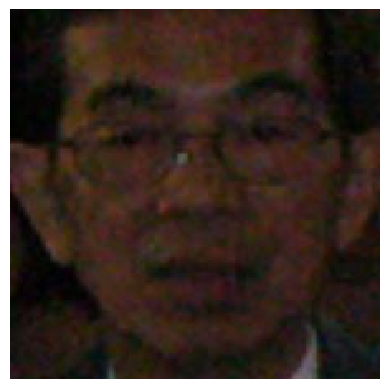

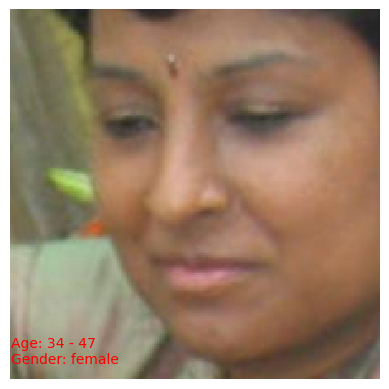

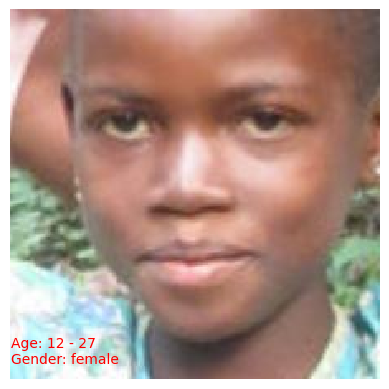

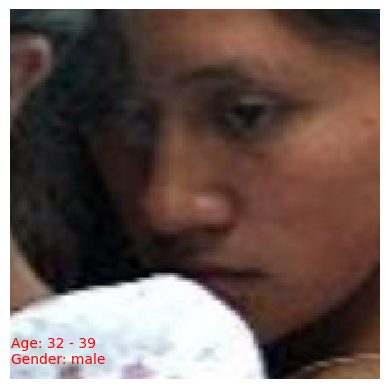

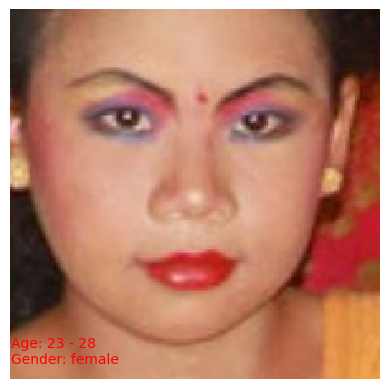

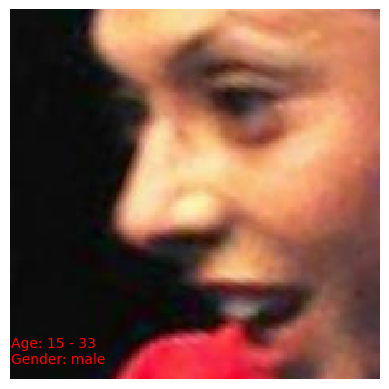

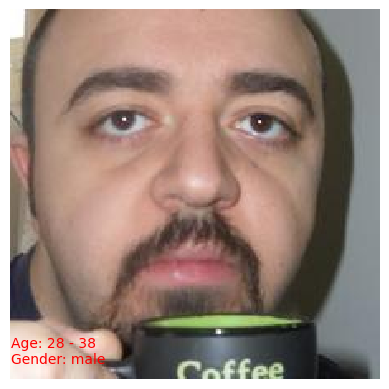

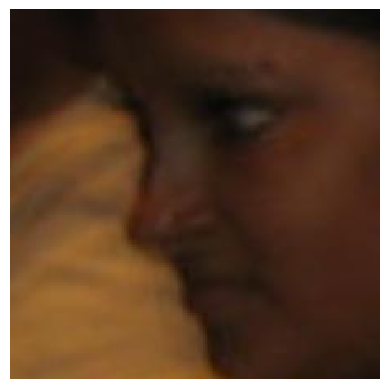

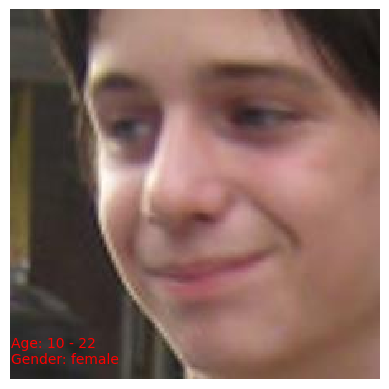

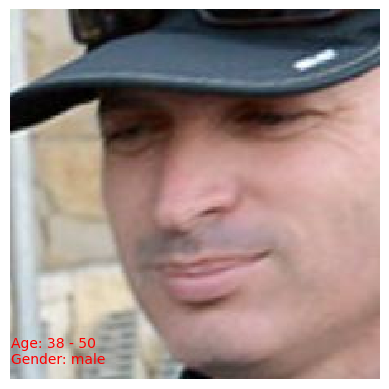

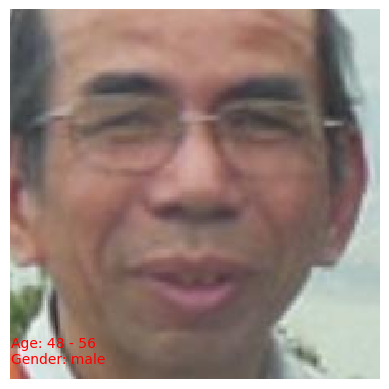

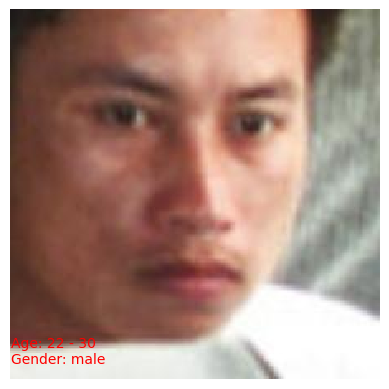

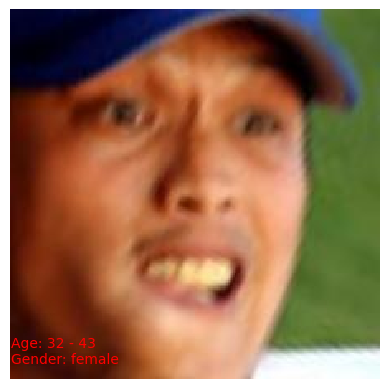

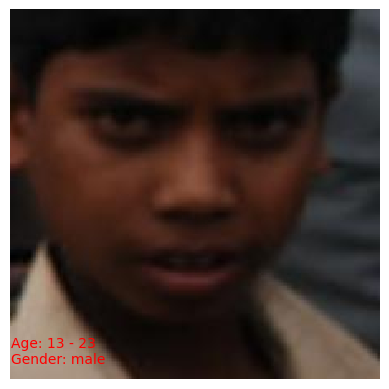

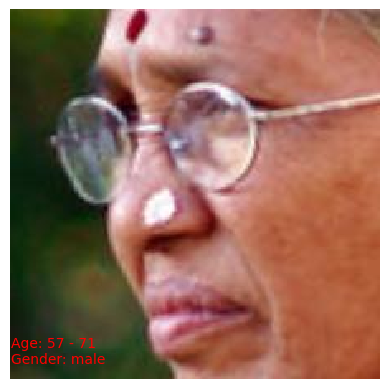

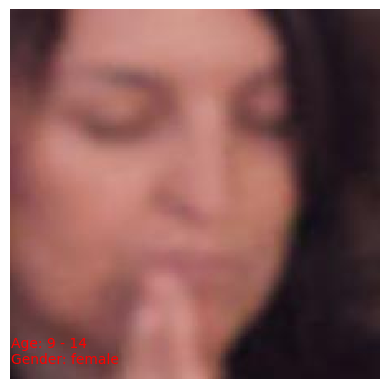

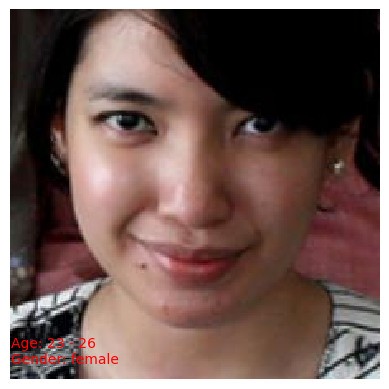

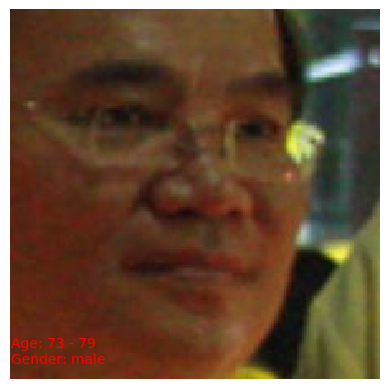

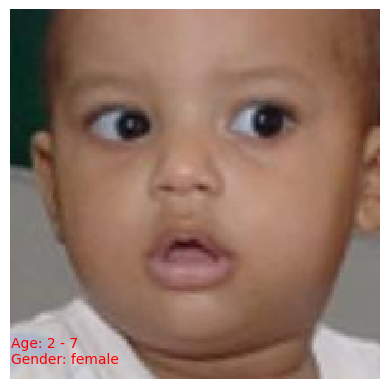

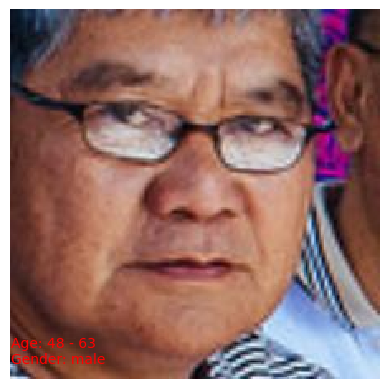

In [10]:
accuracyLvl = 3
InferdoAPIDict = InferdoAPIProcess(imgUrl[0:20], accuracyLvl)

# Displaying the Inferdo processed images
ImageInfoDisplay(InferdoAPIDict)

## BetaFace

The BetaFace API can be found from the following link: https://www.betafaceapi.com/wpa/. The implementation itself follows the guide present in the following video https://www.youtube.com/watch?v=TIGV4sozmd0.

### Note: Currently using free version only 50 imgs per day

In [19]:
# import requests
# from PIL import Image
# from io import BytesIO

def BetaFaceAPIProcess(imgUrls):
    BetaFaceAPIDict = {}
    
    url = 'https://www.betafaceapi.com/api/v2/media'
    
    headers = {
        'accept': 'application/json',
        'Content-Type': 'application/json',
    }
    
    # Arbitrary name required by the API (can be cahnged to anything)
    filename = "tmp.jpg"
    
    # Looping through all the image urls
    for imgIndex in range(len(imgUrls)):
        
        # Url denotes the image url to be processed & accuracy_boost denotes the accuracy that the API will utilise varies from 1 to 4
        data = '{"api_key": "d45fd466-51e2-4701-8da8-04351c872236", "file_uri": "' + imgUrls[imgIndex] + '", "detection_flags": "basicpoints,propoints,classifiers,content", "recognize_targets": [ "all@mynamespace" ], "original_filename": "' + filename + '"}'
        
        # Sending a request to the API
        response = requests.post(url, headers=headers, data=data).json()
        
        ImageInfo = ""
        
        # Retrieving the resultant data, 0 is used in case multiple faces are deteceted in a sinhle image only the first one is considered
        if 'error_code' not in response and 'media' in response:
            if response['media']['faces'] != None:
                gender = response['media']['faces'][0]['tags'][18]['value']
                age = response['media']['faces'][0]['tags'][1]['value']
                emotion = response['media']['faces'][0]['tags'][17]['value']
                race = response['media']['faces'][0]['tags'][31]['value']

                ImageInfo = {'age':age, 'gender':gender, 'race':race, 'emotion':emotion}
            else:
                ImageInfo = {'age':0, 'gender':"n/a", 'race':"n/a", 'emotion':"n/a"}
        else:
            if response['error_code'] == -57:
                print("Maximum Daily Image Reached")
                break
                
        # Send a GET request to the URL and retrieving the image data
        response = requests.get(imgUrls[imgIndex])
        image_data = response.content
        # Converting the image to matrix form
        img = np.array(Image.open(BytesIO(image_data)))
      
        BetaFaceAPIDict[imgIndex] = [img, ImageInfo]
        
    return BetaFaceAPIDict  

{'media': {'media_uuid': '93e5a875-3853-42a8-bfb9-533ba78547a0', 'checksum': '53a2f4883fab88a167ce39002b103374bb650d762c4082d497688386b6ed6ffe', 'faces': [{'face_uuid': '35737221-23e0-11ee-b15d-0cc47a6c4dbd', 'media_uuid': '93e5a875-3853-42a8-bfb9-533ba78547a0', 'x': 108.0, 'y': 97.5, 'width': 161.94, 'height': 201.0, 'angle': 2.2976, 'detection_score': 1.0, 'points': [{'x': 68.32, 'y': 78.1, 'type': 512, 'name': 'basic eye left'}, {'x': 148.85, 'y': 74.83, 'type': 768, 'name': 'basic eye right'}, {'x': 51.29, 'y': 79.61, 'type': 1024, 'name': 'basic eye left outer'}, {'x': 165.63, 'y': 74.87, 'type': 1280, 'name': 'basic eye right outer'}, {'x': 85.68, 'y': 76.83, 'type': 1536, 'name': 'basic eye left inner'}, {'x': 132.11, 'y': 76.83, 'type': 1792, 'name': 'basic eye right inner'}, {'x': 79.88, 'y': 158.91, 'type': 2048, 'name': 'basic mouth left'}, {'x': 143.21, 'y': 157.78, 'type': 2304, 'name': 'basic mouth right'}, {'x': 107.18, 'y': 119.59, 'type': 2560, 'name': 'basic nose tip'

{'media': {'media_uuid': 'd1e46d23-8762-41d3-be49-5e9e273b2e1e', 'checksum': 'db102c959fd515e1b2fd9822c505a460e74df461b4748df188803d0506ed2ec2', 'faces': [{'face_uuid': 'b2cd633c-230c-11ee-b15d-0cc47a6c4dbd', 'media_uuid': 'd1e46d23-8762-41d3-be49-5e9e273b2e1e', 'x': 130.5, 'y': 99.5, 'width': 176.29, 'height': 218.22, 'angle': 1.93, 'detection_score': 1.0, 'points': [{'x': 66.86, 'y': 69.29, 'type': 512, 'name': 'basic eye left'}, {'x': 147.52, 'y': 64.5, 'type': 768, 'name': 'basic eye right'}, {'x': 52.3, 'y': 69.42, 'type': 1024, 'name': 'basic eye left outer'}, {'x': 166.49, 'y': 63.45, 'type': 1280, 'name': 'basic eye right outer'}, {'x': 81.68, 'y': 68.79, 'type': 1536, 'name': 'basic eye left inner'}, {'x': 128.97, 'y': 66.24, 'type': 1792, 'name': 'basic eye right inner'}, {'x': 81.25, 'y': 151.36, 'type': 2048, 'name': 'basic mouth left'}, {'x': 147.5, 'y': 153.68, 'type': 2304, 'name': 'basic mouth right'}, {'x': 94.15, 'y': 124.66, 'type': 2560, 'name': 'basic nose tip'}, {

{'media': {'media_uuid': 'dd6c83b9-a1f0-4222-b0fe-39806b41122d', 'checksum': 'bc262c47903e1f4da9f6cbdecdd1caec05ac53ade33b180cc25e13ef000cf2a9', 'faces': [{'face_uuid': 'b857fd22-230c-11ee-b15d-0cc47a6c4dbd', 'media_uuid': 'dd6c83b9-a1f0-4222-b0fe-39806b41122d', 'x': 115.0, 'y': 95.0, 'width': 167.37, 'height': 195.9, 'angle': 1.2814, 'detection_score': 1.0, 'points': [{'x': 67.17, 'y': 69.82, 'type': 512, 'name': 'basic eye left'}, {'x': 150.41, 'y': 67.87, 'type': 768, 'name': 'basic eye right'}, {'x': 50.85, 'y': 69.75, 'type': 1024, 'name': 'basic eye left outer'}, {'x': 168.42, 'y': 66.83, 'type': 1280, 'name': 'basic eye right outer'}, {'x': 83.64, 'y': 70.36, 'type': 1536, 'name': 'basic eye left inner'}, {'x': 131.9, 'y': 69.0, 'type': 1792, 'name': 'basic eye right inner'}, {'x': 72.7, 'y': 150.09, 'type': 2048, 'name': 'basic mouth left'}, {'x': 141.26, 'y': 148.0, 'type': 2304, 'name': 'basic mouth right'}, {'x': 102.16, 'y': 115.19, 'type': 2560, 'name': 'basic nose tip'}, 

{'media': {'media_uuid': '122aecfd-0964-4aaf-b992-85ff5710adee', 'checksum': '5eb62329a30527585dfeb87084bb5c5f78962ed5e32f6ce012d30f176b869cc0', 'faces': [{'face_uuid': 'bb316915-230c-11ee-b15d-0cc47a6c4dbd', 'media_uuid': '122aecfd-0964-4aaf-b992-85ff5710adee', 'x': 145.0, 'y': 85.5, 'width': 181.48, 'height': 218.73, 'angle': 0.0911, 'detection_score': 1.0, 'points': [{'x': 57.24, 'y': 56.73, 'type': 512, 'name': 'basic eye left'}, {'x': 142.61, 'y': 60.39, 'type': 768, 'name': 'basic eye right'}, {'x': 41.43, 'y': 57.15, 'type': 1024, 'name': 'basic eye left outer'}, {'x': 163.61, 'y': 60.4, 'type': 1280, 'name': 'basic eye right outer'}, {'x': 73.58, 'y': 58.4, 'type': 1536, 'name': 'basic eye left inner'}, {'x': 123.13, 'y': 60.39, 'type': 1792, 'name': 'basic eye right inner'}, {'x': 60.72, 'y': 149.11, 'type': 2048, 'name': 'basic mouth left'}, {'x': 133.01, 'y': 153.34, 'type': 2304, 'name': 'basic mouth right'}, {'x': 85.05, 'y': 107.92, 'type': 2560, 'name': 'basic nose tip'}

{'media': {'media_uuid': '6ce5b1f2-f508-4eda-96c2-d903bc48ab7a', 'checksum': 'bf2b7a6557cc75fe359d3ffd408afc164be9ab6121ba4db69104b974f67450fa', 'faces': [{'face_uuid': 'bf675b4d-230c-11ee-b15d-0cc47a6c4dbd', 'media_uuid': '6ce5b1f2-f508-4eda-96c2-d903bc48ab7a', 'x': 101.5, 'y': 96.5, 'width': 168.18, 'height': 206.19, 'angle': -1.3886, 'detection_score': 1.0, 'points': [{'x': 66.49, 'y': 66.66, 'type': 512, 'name': 'basic eye left'}, {'x': 145.45, 'y': 69.04, 'type': 768, 'name': 'basic eye right'}, {'x': 48.3, 'y': 66.06, 'type': 1024, 'name': 'basic eye left outer'}, {'x': 162.68, 'y': 69.9, 'type': 1280, 'name': 'basic eye right outer'}, {'x': 84.59, 'y': 68.08, 'type': 1536, 'name': 'basic eye left inner'}, {'x': 129.0, 'y': 69.17, 'type': 1792, 'name': 'basic eye right inner'}, {'x': 75.53, 'y': 153.33, 'type': 2048, 'name': 'basic mouth left'}, {'x': 132.4, 'y': 153.0, 'type': 2304, 'name': 'basic mouth right'}, {'x': 108.05, 'y': 116.26, 'type': 2560, 'name': 'basic nose tip'},


{'media': {'media_uuid': '4db053b8-6b96-43ee-8756-cdbf00d9b9ca', 'checksum': '01d068633ea03ee00a1b505260da32f9e3271a1708ca0216895e6e05c4ed610b', 'faces': None, 'tags': [{'name': 'adult content', 'value': 'no', 'confidence': 0.01, 'x': 0.0, 'y': 0.0, 'width': 0.0, 'height': 0.0, 'angle': 0.0, 'instance_id': 0, 'start': '00:00:00', 'duration': '00:00:00'}], 'original_filename': 'tmp.jpg', 'duration': '00:00:00'}, 'recognize': None}


{'media': {'media_uuid': '87eebecd-821f-43e6-9e09-3ad007c3b863', 'checksum': '4bc255186d925d85bc8c8bda2954ae703c9d641d07390ceefddceab2f8118cf8', 'faces': [{'face_uuid': '81e17023-2310-11ee-b15d-0cc47a6c4dbd', 'media_uuid': '87eebecd-821f-43e6-9e09-3ad007c3b863', 'x': 108.0, 'y': 104.0, 'width': 170.84, 'height': 224.0, 'angle': -1.3612, 'detection_score': 1.0, 'points': [{'x': 64.79, 'y': 68.02, 'type': 512, 'name': 'basic eye left'}, {'x': 149.63, 'y': 69.36, 'type': 768, 'name': 'basic eye right'}, {'x': 46.81, 'y': 70.02, 'type': 1024, 'name': 'basic eye left outer'}, {'x': 166.07, 'y': 72.93, 'type': 1280, 'name': 'basic eye right outer'}, {'x': 83.06, 'y': 68.7, 'type': 1536, 'name': 'basic eye left inner'}, {'x': 131.76, 'y': 70.36, 'type': 1792, 'name': 'basic eye right inner'}, {'x': 73.13, 'y': 165.53, 'type': 2048, 'name': 'basic mouth left'}, {'x': 138.05, 'y': 167.44, 'type': 2304, 'name': 'basic mouth right'}, {'x': 110.69, 'y': 111.83, 'type': 2560, 'name': 'basic nose ti

{'media': {'media_uuid': '8c439d1e-f983-408f-99bd-53c8c256e5fa', 'checksum': '4fdb2d18514ccd8ec6344a0511f2bff2449d11cda61b7f916d8cdfdd66b0e344', 'faces': None, 'tags': [{'name': 'adult content', 'value': 'no', 'confidence': 0.56, 'x': 0.0, 'y': 0.0, 'width': 0.0, 'height': 0.0, 'angle': 0.0, 'instance_id': 0, 'start': '00:00:00', 'duration': '00:00:00'}], 'original_filename': '8.jpg', 'duration': '00:00:00'}, 'recognize': None}


{'media': {'media_uuid': '92e8dafb-e178-44cf-9b6c-4926cccb9ffc', 'checksum': '2d106ae324070fe2d3b318b3677377a33df4410618197c21c8d4a2613cb273ad', 'faces': [{'face_uuid': 'a3a2576c-2310-11ee-b15d-0cc47a6c4dbd', 'media_uuid': '92e8dafb-e178-44cf-9b6c-4926cccb9ffc', 'x': 133.5, 'y': 99.5, 'width': 168.35, 'height': 215.9, 'angle': 4.8934, 'detection_score': 1.0, 'points': [{'x': 68.23, 'y': 70.9, 'type': 512, 'name': 'basic eye left'}, {'x': 149.01, 'y': 64.22, 'type': 768, 'name': 'basic eye right'}, {'x': 56.68, 'y': 71.8, 'type': 1024, 'name': 'basic eye left outer'}, {'x': 167.23, 'y': 63.36, 'type': 1280, 'name': 'basic eye right outer'}, {'x': 83.07, 'y': 71.19, 'type': 1536, 'name': 'basic eye left inner'}, {'x': 128.09, 'y': 65.97, 'type': 1792, 'name': 'basic eye right inner'}, {'x': 81.23, 'y': 157.63, 'type': 2048, 'name': 'basic mouth left'}, {'x': 152.76, 'y': 147.63, 'type': 2304, 'name': 'basic mouth right'}, {'x': 91.95, 'y': 121.64, 'type': 2560, 'name': 'basic nose tip'},

{'media': {'media_uuid': '949a26ac-cd7b-4734-a23e-eca0e43dd723', 'checksum': '3b1a086ca87ef56576af8c7269a5579dde2d29782e3ab89a6fc0a08e692d552f', 'faces': [{'face_uuid': 'bb913e30-23e1-11ee-b15d-0cc47a6c4dbd', 'media_uuid': '949a26ac-cd7b-4734-a23e-eca0e43dd723', 'x': 124.5, 'y': 106.0, 'width': 177.73, 'height': 207.19, 'angle': 4.7304, 'detection_score': 1.0, 'points': [{'x': 72.9, 'y': 73.24, 'type': 512, 'name': 'basic eye left'}, {'x': 150.29, 'y': 64.66, 'type': 768, 'name': 'basic eye right'}, {'x': 56.82, 'y': 75.06, 'type': 1024, 'name': 'basic eye left outer'}, {'x': 168.45, 'y': 63.36, 'type': 1280, 'name': 'basic eye right outer'}, {'x': 86.77, 'y': 72.44, 'type': 1536, 'name': 'basic eye left inner'}, {'x': 131.73, 'y': 66.76, 'type': 1792, 'name': 'basic eye right inner'}, {'x': 83.06, 'y': 157.35, 'type': 2048, 'name': 'basic mouth left'}, {'x': 150.93, 'y': 149.16, 'type': 2304, 'name': 'basic mouth right'}, {'x': 95.59, 'y': 124.36, 'type': 2560, 'name': 'basic nose tip

{'media': {'media_uuid': '80f2d6bb-8766-4f06-be77-fcb0d4309152', 'checksum': 'cec92c36b8ac0c53a7c9c85b6a64b78a8ec8cced175df185cedaa2a1903fdeb9', 'faces': [{'face_uuid': 'bd1e05c0-23e1-11ee-b15d-0cc47a6c4dbd', 'media_uuid': '80f2d6bb-8766-4f06-be77-fcb0d4309152', 'x': 100.5, 'y': 102.0, 'width': 171.87, 'height': 216.49, 'angle': -0.6847, 'detection_score': 1.0, 'points': [{'x': 63.88, 'y': 68.62, 'type': 512, 'name': 'basic eye left'}, {'x': 147.44, 'y': 67.38, 'type': 768, 'name': 'basic eye right'}, {'x': 45.24, 'y': 69.99, 'type': 1024, 'name': 'basic eye left outer'}, {'x': 163.66, 'y': 69.32, 'type': 1280, 'name': 'basic eye right outer'}, {'x': 82.83, 'y': 66.67, 'type': 1536, 'name': 'basic eye left inner'}, {'x': 128.54, 'y': 66.28, 'type': 1792, 'name': 'basic eye right inner'}, {'x': 64.56, 'y': 158.32, 'type': 2048, 'name': 'basic mouth left'}, {'x': 139.92, 'y': 160.07, 'type': 2304, 'name': 'basic mouth right'}, {'x': 109.46, 'y': 116.57, 'type': 2560, 'name': 'basic nose 

{'media': {'media_uuid': '0db1619c-98aa-42f4-b3c3-3b3c4d26b1a8', 'checksum': 'a5a61f159b19ee579dc3ebf66c5b25477725e0ec340628e9c4bdf203f92f5491', 'faces': [{'face_uuid': 'becec8e5-23e1-11ee-b15d-0cc47a6c4dbd', 'media_uuid': '0db1619c-98aa-42f4-b3c3-3b3c4d26b1a8', 'x': 88.0, 'y': 97.0, 'width': 171.74, 'height': 221.35, 'angle': -2.8981, 'detection_score': 1.0, 'points': [{'x': 65.84, 'y': 63.86, 'type': 512, 'name': 'basic eye left'}, {'x': 143.66, 'y': 69.69, 'type': 768, 'name': 'basic eye right'}, {'x': 45.46, 'y': 62.09, 'type': 1024, 'name': 'basic eye left outer'}, {'x': 159.34, 'y': 69.57, 'type': 1280, 'name': 'basic eye right outer'}, {'x': 83.19, 'y': 67.41, 'type': 1536, 'name': 'basic eye left inner'}, {'x': 127.45, 'y': 70.69, 'type': 1792, 'name': 'basic eye right inner'}, {'x': 69.51, 'y': 159.49, 'type': 2048, 'name': 'basic mouth left'}, {'x': 132.41, 'y': 160.79, 'type': 2304, 'name': 'basic mouth right'}, {'x': 113.64, 'y': 125.11, 'type': 2560, 'name': 'basic nose ti

{'media': {'media_uuid': '810e1717-6222-453f-a0a5-deb6f840966b', 'checksum': 'fd00f04feee8dbd77c1df43bb963b991756ada7fd0edd7c73fd0ba3363907fd0', 'faces': [{'face_uuid': '08e72287-2312-11ee-b15d-0cc47a6c4dbd', 'media_uuid': '810e1717-6222-453f-a0a5-deb6f840966b', 'x': 91.0, 'y': 103.0, 'width': 169.86, 'height': 217.58, 'angle': -0.9624, 'detection_score': 1.0, 'points': [{'x': 59.56, 'y': 63.33, 'type': 512, 'name': 'basic eye left'}, {'x': 142.13, 'y': 68.15, 'type': 768, 'name': 'basic eye right'}, {'x': 40.4, 'y': 63.28, 'type': 1024, 'name': 'basic eye left outer'}, {'x': 156.92, 'y': 68.97, 'type': 1280, 'name': 'basic eye right outer'}, {'x': 77.77, 'y': 63.75, 'type': 1536, 'name': 'basic eye left inner'}, {'x': 126.67, 'y': 66.84, 'type': 1792, 'name': 'basic eye right inner'}, {'x': 74.73, 'y': 150.82, 'type': 2048, 'name': 'basic mouth left'}, {'x': 134.95, 'y': 155.79, 'type': 2304, 'name': 'basic mouth right'}, {'x': 114.15, 'y': 111.64, 'type': 2560, 'name': 'basic nose ti

{'media': {'media_uuid': '6463ca7e-d10d-4ca2-83bc-8a0ebf829bee', 'checksum': 'de85e97ed0f51970c13c08f13671e7546465782d8797e0ff96f2c8c253bef9fd', 'faces': [{'face_uuid': '0ac2168b-2312-11ee-b15d-0cc47a6c4dbd', 'media_uuid': '6463ca7e-d10d-4ca2-83bc-8a0ebf829bee', 'x': 97.5, 'y': 97.0, 'width': 157.42, 'height': 190.81, 'angle': -1.43, 'detection_score': 1.0, 'points': [{'x': 65.76, 'y': 65.31, 'type': 512, 'name': 'basic eye left'}, {'x': 147.73, 'y': 67.36, 'type': 768, 'name': 'basic eye right'}, {'x': 46.1, 'y': 63.8, 'type': 1024, 'name': 'basic eye left outer'}, {'x': 165.65, 'y': 67.16, 'type': 1280, 'name': 'basic eye right outer'}, {'x': 84.3, 'y': 68.16, 'type': 1536, 'name': 'basic eye left inner'}, {'x': 130.9, 'y': 69.22, 'type': 1792, 'name': 'basic eye right inner'}, {'x': 72.47, 'y': 150.47, 'type': 2048, 'name': 'basic mouth left'}, {'x': 136.8, 'y': 149.38, 'type': 2304, 'name': 'basic mouth right'}, {'x': 110.3, 'y': 119.58, 'type': 2560, 'name': 'basic nose tip'}, {'x

{'media': {'media_uuid': '1c9481df-a942-4b01-959a-bb959beac864', 'checksum': '0f4092464289bf7e60a932bb4e27707353ee8796cec29b4408f68bf611a515f7', 'faces': [{'face_uuid': '0c9a262e-2312-11ee-b15d-0cc47a6c4dbd', 'media_uuid': '1c9481df-a942-4b01-959a-bb959beac864', 'x': 141.5, 'y': 100.0, 'width': 182.52, 'height': 252.27, 'angle': 4.3387, 'detection_score': 1.0, 'points': [{'x': 53.76, 'y': 67.55, 'type': 512, 'name': 'basic eye left'}, {'x': 143.09, 'y': 59.18, 'type': 768, 'name': 'basic eye right'}, {'x': 38.83, 'y': 69.9, 'type': 1024, 'name': 'basic eye left outer'}, {'x': 164.21, 'y': 61.03, 'type': 1280, 'name': 'basic eye right outer'}, {'x': 68.04, 'y': 66.0, 'type': 1536, 'name': 'basic eye left inner'}, {'x': 122.19, 'y': 60.57, 'type': 1792, 'name': 'basic eye right inner'}, {'x': 70.5, 'y': 189.89, 'type': 2048, 'name': 'basic mouth left'}, {'x': 147.54, 'y': 184.98, 'type': 2304, 'name': 'basic mouth right'}, {'x': 86.14, 'y': 132.07, 'type': 2560, 'name': 'basic nose tip'}

{'media': {'media_uuid': '724bc709-a867-485b-bd95-4be9ca24deea', 'checksum': '6beb7068bcc2f4ea58df1a5df85114d10b6952091b68511e975317b5df057dcc', 'faces': [{'face_uuid': '0e4d0bee-2312-11ee-b15d-0cc47a6c4dbd', 'media_uuid': '724bc709-a867-485b-bd95-4be9ca24deea', 'x': 88.0, 'y': 100.5, 'width': 181.31, 'height': 224.25, 'angle': 2.0623, 'detection_score': 0.99, 'points': [{'x': 61.83, 'y': 63.3, 'type': 512, 'name': 'basic eye left'}, {'x': 156.2, 'y': 58.05, 'type': 768, 'name': 'basic eye right'}, {'x': 38.67, 'y': 63.11, 'type': 1024, 'name': 'basic eye left outer'}, {'x': 175.5, 'y': 56.1, 'type': 1280, 'name': 'basic eye right outer'}, {'x': 83.84, 'y': 63.53, 'type': 1536, 'name': 'basic eye left inner'}, {'x': 138.32, 'y': 60.97, 'type': 1792, 'name': 'basic eye right inner'}, {'x': 150.79, 'y': 156.53, 'type': 2048, 'name': 'basic mouth left'}, {'x': 259.07, 'y': 141.29, 'type': 2304, 'name': 'basic mouth right'}, {'x': 177.37, 'y': 102.38, 'type': 2560, 'name': 'basic nose tip'

{'media': {'media_uuid': 'e1b32ab6-079d-4273-b474-48a0145a30d1', 'checksum': 'f63ccad8824e49b0abfb219d79a3d1f920b28ac3dfa35e8aeba9ac0df8ad637b', 'faces': [{'face_uuid': '100bb8fc-2312-11ee-b15d-0cc47a6c4dbd', 'media_uuid': 'e1b32ab6-079d-4273-b474-48a0145a30d1', 'x': 109.0, 'y': 93.0, 'width': 156.94, 'height': 199.05, 'angle': -1.3658, 'detection_score': 1.0, 'points': [{'x': 67.27, 'y': 67.91, 'type': 512, 'name': 'basic eye left'}, {'x': 147.88, 'y': 70.29, 'type': 768, 'name': 'basic eye right'}, {'x': 50.94, 'y': 66.87, 'type': 1024, 'name': 'basic eye left outer'}, {'x': 164.04, 'y': 68.82, 'type': 1280, 'name': 'basic eye right outer'}, {'x': 82.88, 'y': 70.6, 'type': 1536, 'name': 'basic eye left inner'}, {'x': 131.06, 'y': 71.24, 'type': 1792, 'name': 'basic eye right inner'}, {'x': 70.37, 'y': 141.12, 'type': 2048, 'name': 'basic mouth left'}, {'x': 139.57, 'y': 145.16, 'type': 2304, 'name': 'basic mouth right'}, {'x': 105.09, 'y': 123.67, 'type': 2560, 'name': 'basic nose ti

{'media': {'media_uuid': '0ed0be93-5d48-4848-9ff8-1f7097c224fe', 'checksum': '24dcbdcf783147dfbae10b2fe09a941a4be35041144da5aa5f26fea187b13fcc', 'faces': [{'face_uuid': '11b38108-2312-11ee-b15d-0cc47a6c4dbd', 'media_uuid': '0ed0be93-5d48-4848-9ff8-1f7097c224fe', 'x': 88.0, 'y': 102.5, 'width': 177.26, 'height': 241.12, 'angle': -6.1448, 'detection_score': 0.99, 'points': [{'x': 63.92, 'y': 64.35, 'type': 512, 'name': 'basic eye left'}, {'x': 144.11, 'y': 71.56, 'type': 768, 'name': 'basic eye right'}, {'x': 44.69, 'y': 63.45, 'type': 1024, 'name': 'basic eye left outer'}, {'x': 160.26, 'y': 73.35, 'type': 1280, 'name': 'basic eye right outer'}, {'x': 84.04, 'y': 65.95, 'type': 1536, 'name': 'basic eye left inner'}, {'x': 129.0, 'y': 71.61, 'type': 1792, 'name': 'basic eye right inner'}, {'x': 64.7, 'y': 153.72, 'type': 2048, 'name': 'basic mouth left'}, {'x': 136.48, 'y': 158.32, 'type': 2304, 'name': 'basic mouth right'}, {'x': 110.43, 'y': 116.56, 'type': 2560, 'name': 'basic nose ti

{'media': {'media_uuid': 'd84719fc-6859-4bb7-bb68-b307c4bcca70', 'checksum': '62b0b158bd9f5b8fd71531ca13212da3e3b5f943bda72e95dfb6244c592bc7b4', 'faces': [{'face_uuid': '13a8f5b6-2312-11ee-b15d-0cc47a6c4dbd', 'media_uuid': 'd84719fc-6859-4bb7-bb68-b307c4bcca70', 'x': 113.0, 'y': 91.0, 'width': 171.63, 'height': 209.77, 'angle': 1.8589, 'detection_score': 1.0, 'points': [{'x': 65.83, 'y': 71.21, 'type': 512, 'name': 'basic eye left'}, {'x': 148.59, 'y': 69.49, 'type': 768, 'name': 'basic eye right'}, {'x': 46.98, 'y': 71.26, 'type': 1024, 'name': 'basic eye left outer'}, {'x': 165.46, 'y': 68.83, 'type': 1280, 'name': 'basic eye right outer'}, {'x': 81.27, 'y': 73.27, 'type': 1536, 'name': 'basic eye left inner'}, {'x': 130.49, 'y': 70.9, 'type': 1792, 'name': 'basic eye right inner'}, {'x': 80.23, 'y': 149.02, 'type': 2048, 'name': 'basic mouth left'}, {'x': 129.51, 'y': 147.6, 'type': 2304, 'name': 'basic mouth right'}, {'x': 97.96, 'y': 101.93, 'type': 2560, 'name': 'basic nose tip'}

{'media': {'media_uuid': '5cb61c60-440e-46c2-9ded-58c3ae510592', 'checksum': '28b8d47a6159d84cb67dfdc98994836baddb00249e37307ec7569d41cb048bb5', 'faces': [{'face_uuid': '16d93494-2312-11ee-b15d-0cc47a6c4dbd', 'media_uuid': '5cb61c60-440e-46c2-9ded-58c3ae510592', 'x': 96.0, 'y': 89.0, 'width': 167.56, 'height': 222.78, 'angle': -3.7195, 'detection_score': 1.0, 'points': [{'x': 65.45, 'y': 62.26, 'type': 512, 'name': 'basic eye left'}, {'x': 144.66, 'y': 70.35, 'type': 768, 'name': 'basic eye right'}, {'x': 48.12, 'y': 61.26, 'type': 1024, 'name': 'basic eye left outer'}, {'x': 160.66, 'y': 70.92, 'type': 1280, 'name': 'basic eye right outer'}, {'x': 83.59, 'y': 65.49, 'type': 1536, 'name': 'basic eye left inner'}, {'x': 129.32, 'y': 70.05, 'type': 1792, 'name': 'basic eye right inner'}, {'x': 68.97, 'y': 154.02, 'type': 2048, 'name': 'basic mouth left'}, {'x': 134.37, 'y': 155.2, 'type': 2304, 'name': 'basic mouth right'}, {'x': 114.02, 'y': 120.56, 'type': 2560, 'name': 'basic nose tip

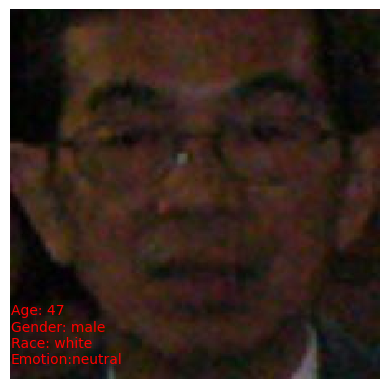

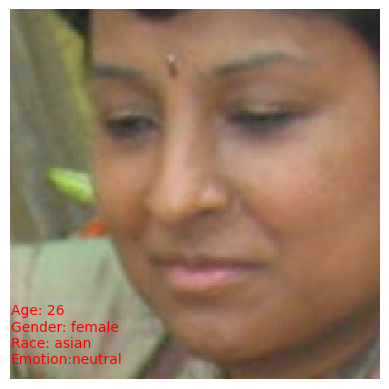

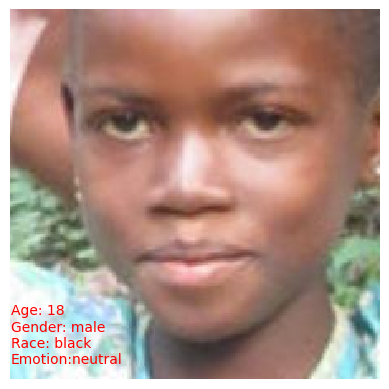

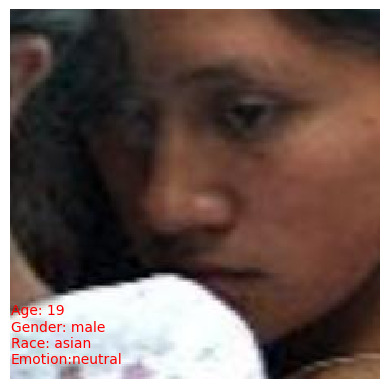

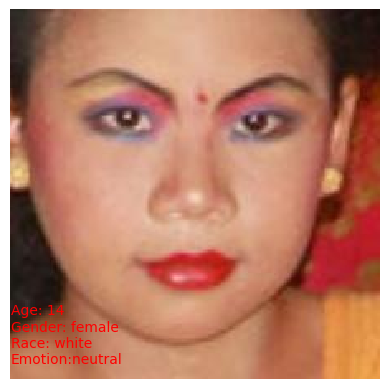

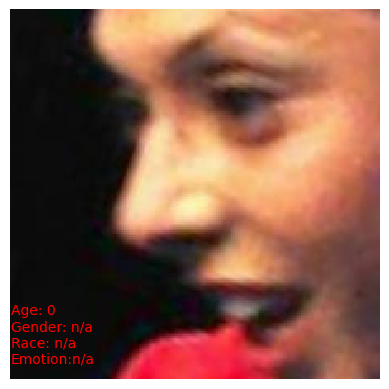

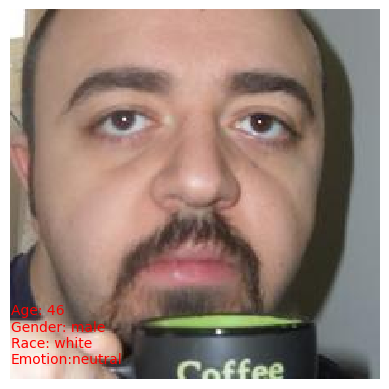

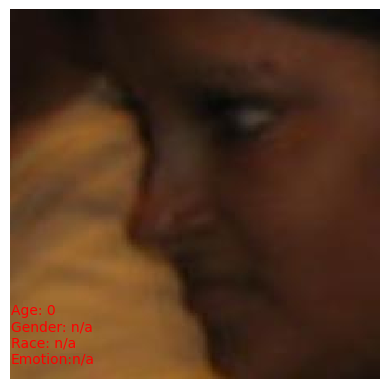

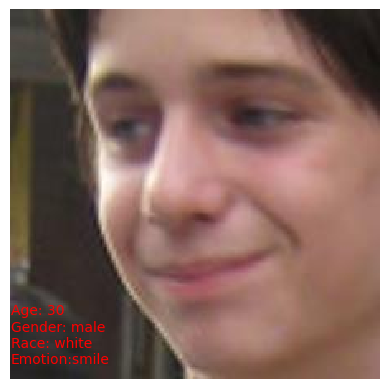

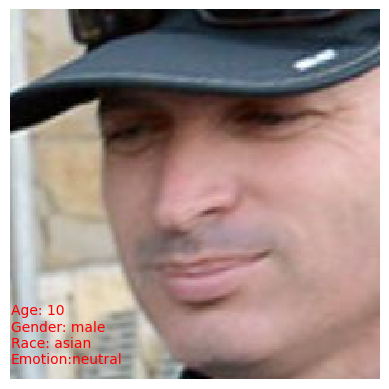

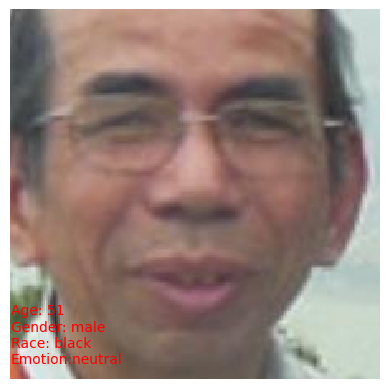

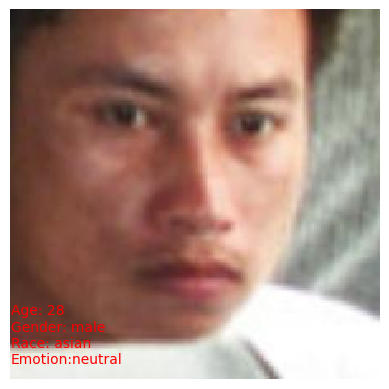

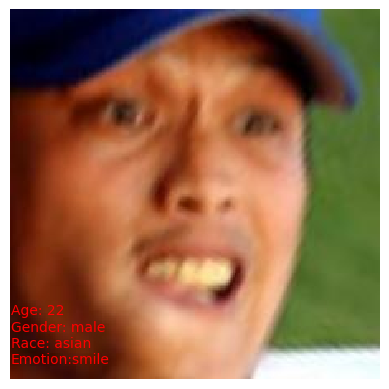

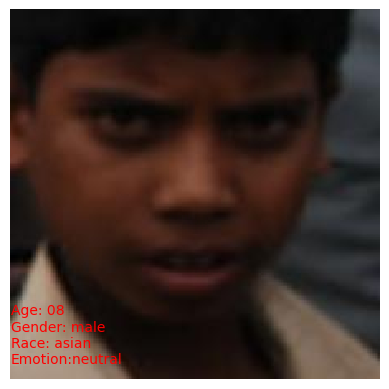

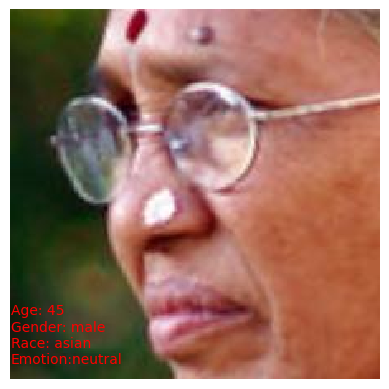

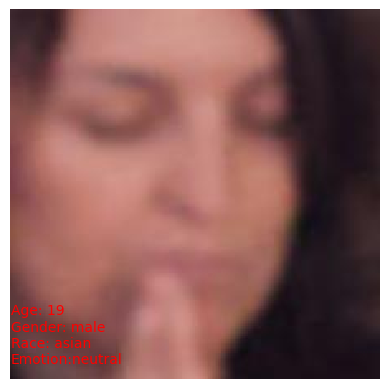

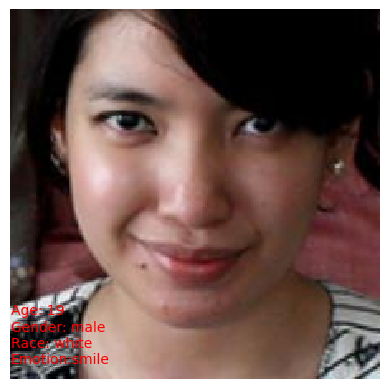

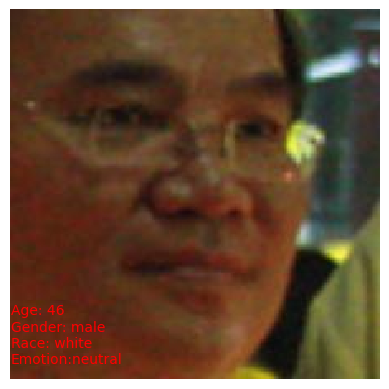

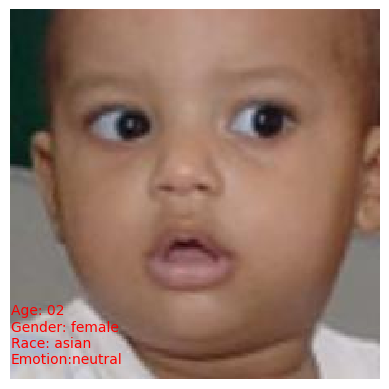

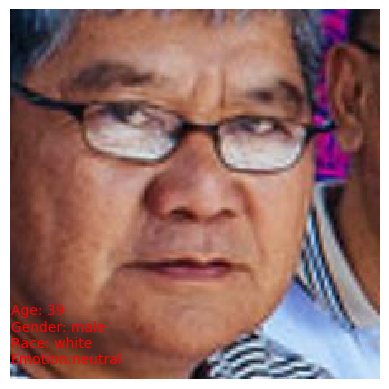

In [20]:
BetaFaceAPIDict = BetaFaceAPIProcess(imgUrl[0:20])
# Displaying the Inferdo processed images
ImageInfoDisplay(BetaFaceAPIDict)

# Comparing Detection Techniques

In [21]:
# Retrieving the ground truth data

# Specify the ground truth file path
csv_file = 'FairFace/groundTruth/fairface_label_train.csv'

df = pd.read_csv(csv_file)

### GroundTruth Cleaning

In [22]:
# Retrivieng all unique races in the dataset
uniqueRaces = df['race'].unique()
print(uniqueRaces)

['East Asian' 'Indian' 'Black' 'White' 'Middle Eastern' 'Latino_Hispanic'
 'Southeast Asian']


In [23]:
# Function used to replace data with its equivalent thus facilitating easier processing (DataCleanUp)
def CleanFairFaceGroundTruth(df):
    df['race'].replace('East Asian', 'Asian', inplace=True)
    df['race'].replace('Latino_Hispanic', 'Latino', inplace=True)
    df['race'].replace('Southeast Asian', 'Asian', inplace=True)
    
CleanFairFaceGroundTruth(df)

In [24]:
# Function used to keep track of which results match with the groundturth 
def CompareResultsToGroundTruth(imageDict, groundTruth):
    #Counters used keep track of mis/matches
    ageMatchCounter = 0
    genderMatchCounter = 0
    raceMatchCounter = 0
    emotionMatchCounter = 0
    
    ageMisMatchCounter = 0
    genderMisMatchCounter = 0
    raceMisMatchCounter = 0
    emotionMisMatchCounter = 0
    
    for itemIndex in range(len(imageDict.items())):
        
        # Checking for correct age assignment 
        if 'age' in imageDict[itemIndex][1] and 'age' in groundTruth:
            # Extract the lower and upper limits
            lower_limit, upper_limit = map(int, groundTruth['age'][itemIndex].split("-"))
            age = imageDict[itemIndex][1]['age']
            if lower_limit <= int(age) <= upper_limit:
                ageMatchCounter+=1
            else:
                ageMisMatchCounter+=1
        
        # Checking for correct gender assignment 
        if 'gender' in imageDict[itemIndex][1] and 'gender' in groundTruth:
            if imageDict[itemIndex][1]['gender'].lower() == groundTruth['gender'][itemIndex].lower():
                genderMatchCounter+=1
            else:
                genderMisMatchCounter+=1
            
        # Checking for correct race assignment 
        if 'race' in imageDict[itemIndex][1] and 'race' in groundTruth:
            if imageDict[itemIndex][1]['race'].lower() == groundTruth['race'][itemIndex].lower():
                raceMatchCounter+=1
            else:
                raceMisMatchCounter+=1
            
        # Checking for correct emotion assignment 
        if 'emotion' in imageDict[itemIndex][1] and 'emotion' in groundTruth:
            if imageDict[itemIndex][1]['emotion'].lower() == groundTruth['emotion'][itemIndex].lower():
                emotionMatchCounter+=1
            else:
                emotionMisMatchCounter+=1
    
    return {'age':ageMatchCounter,
    'gender':genderMatchCounter,
    'race':raceMatchCounter,
    'emotion':emotionMatchCounter,
    'ageNot':ageMisMatchCounter,
    'genderNot':genderMisMatchCounter,
    'raceNot':raceMisMatchCounter,
    'emotionNot':emotionMisMatchCounter}

DeepFaceComparisonResults = CompareResultsToGroundTruth(DeepFaceDict,df)

### DeepFace Output Comaprison Visualisation 

In [25]:
# Function used to draw a piechart of two related data points
def drawPieChart(category, comparisonResults):
    item1 = comparisonResults[category]
    item2 = comparisonResults[category+'Not']

    # Plotting the pie chart
    plt.pie([item1,item2], labels=["Correct", "Incorrect"], autopct='%1.1f%%')

    # Set aspect ratio to be equal so that pie is drawn as a circle
    plt.axis('equal')

    # Add a title
    plt.title(category)

    # Display the pie chart
    plt.show()

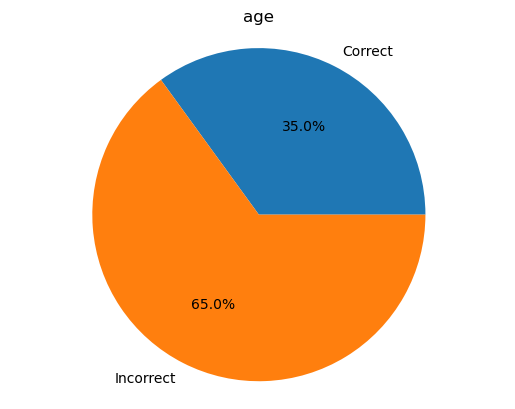

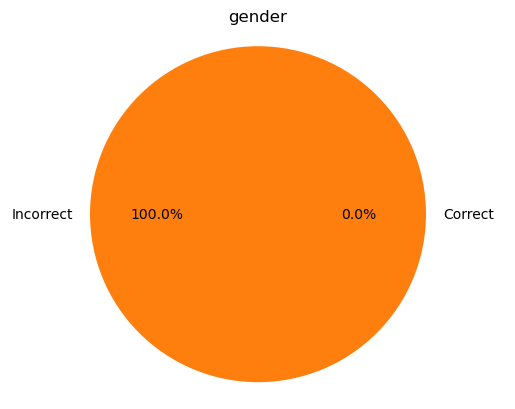

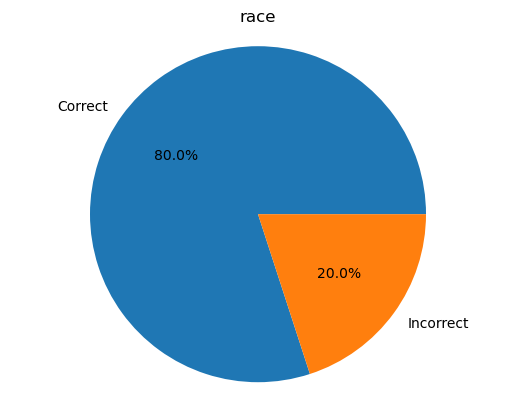

In [26]:
drawPieChart('age',DeepFaceComparisonResults)
print("")
drawPieChart('gender',DeepFaceComparisonResults)
print("")
drawPieChart('race',DeepFaceComparisonResults)
print("")
# drawPieChart('emotion',DeepFaceComparisonResults)

### Inferdo API Output Comaprison Visualisation 

In [27]:
# Inferdo API data cleanup
for itemIndex in range(len(InferdoAPIDict)):
    if InferdoAPIDict[itemIndex][1]:
        if InferdoAPIDict[itemIndex][1]['age']:
            
            lower_limit, upper_limit = map(int, InferdoAPIDict[itemIndex][1]['age'].split("-"))
            
            # Converting the age range into an average of the lower/upper limits
            InferdoAPIDict[itemIndex][1]['age'] = round((lower_limit + upper_limit)/2)

In [29]:
InferdoAPICompareResults = CompareResultsToGroundTruth(InferdoAPIDict, df)

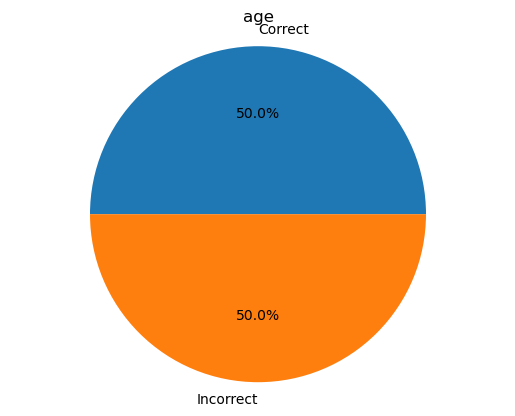

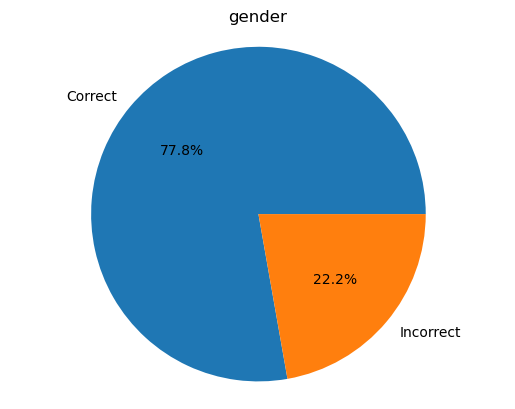

In [30]:
drawPieChart('age',InferdoAPICompareResults)
print("")
drawPieChart('gender',InferdoAPICompareResults)
print("")

### BetaFace Output Comaprison Visualisation

In [32]:
BetaFaceCompareResults = CompareResultsToGroundTruth(BetaFaceAPIDict, df)

In [33]:
BetaFaceCompareResults

{'age': 6,
 'gender': 13,
 'race': 3,
 'emotion': 0,
 'ageNot': 14,
 'genderNot': 7,
 'raceNot': 17,
 'emotionNot': 0}

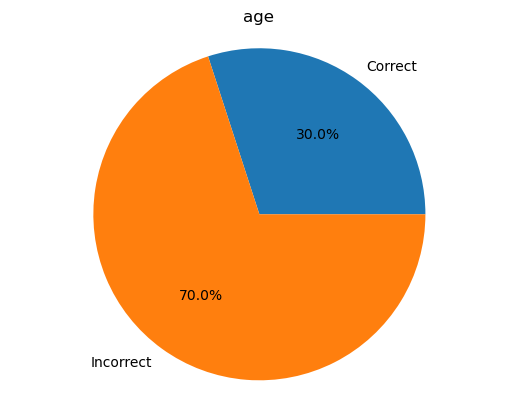

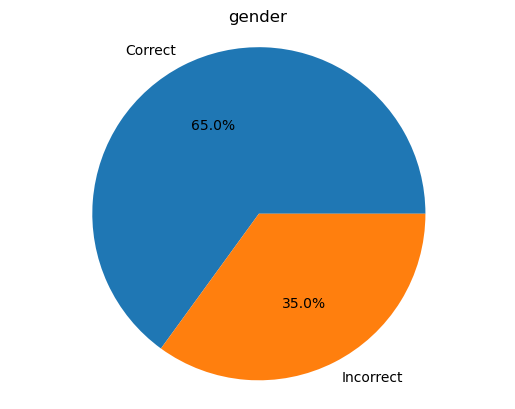

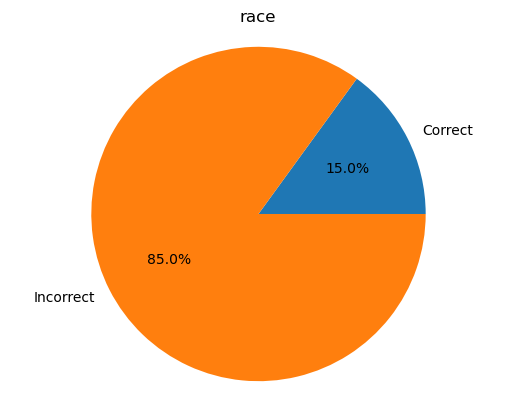

In [36]:
drawPieChart('age',BetaFaceCompareResults)
print("")
drawPieChart('gender',BetaFaceCompareResults)
print("")
drawPieChart('race',BetaFaceCompareResults)

### Clip Lion5B Image retrievel

In [37]:
# %pip install clip-retrieval img2dataset

In [38]:
#Code-Link: https://colab.research.google.com/github/rom1504/clip-retrieval/blob/master/notebook/clip-client-query-api.ipynb#scrollTo=LtInBZF-vTuE

from IPython.display import Image, display
from clip_retrieval.clip_client import ClipClient, Modality

In [39]:
# Function used to retrive images from the lion5B dataset 
def retrieveImages(text, aes_score, aes_weight, num_of_images):
    client = ClipClient(
        url="https://knn.laion.ai/knn-service",
        indice_name="laion5B-H-14",
        aesthetic_score=aes_score,
        aesthetic_weight=aes_weight,
        modality=Modality.IMAGE,
        num_images=num_of_images,
    )
    
    img_results = client.query(text)
    
    return img_results

In [40]:
# Retrieving the indicated images 
text = "Doctor"
aes_score = 9
aes_weight = 0.5
num_of_images = 100

img_results = retrieveImages(text, aes_score, aes_weight, num_of_images)

In [41]:
# import requests

# Storing the images in a list
list_of_images = []

# Retrieving the images from their respective url
for x in range(len(img_results)):
    image = img_results[x]['url']
    list_of_images.append(image)

### DeepFace Lion5B Implementation

In [46]:
# from deepface import DeepFace

#Alternate DeepFace implementation
def DeepFaceProcess(listOfImages):
    DeepFaceDict = {}
    counter = 0
    
    for imgIndex in range(len(listOfImages)):
        try:
            #display(Image(listOfImages[imgIndex]))

            # Retrieving the age/gender/race/emotion of the image
            # Note: enforce_detection=False used so that images where the face isn't fully visible are still considered
            objs = DeepFace.analyze(listOfImages[imgIndex], actions = ['age', 'gender', 'race', 'emotion'], enforce_detection=False)

            ImageInfo = {'age':objs[0]['age'], 'gender':objs[0]['dominant_gender'], 'race':objs[0]['dominant_race'], 'emotion':objs[0]['dominant_emotion']}

            # Storing the images in a dictionary 
            DeepFaceDict[counter] = [Image(listOfImages[imgIndex]),ImageInfo]
            counter+=1
        except:
            counter-=1
            print("Error")
        
    return DeepFaceDict

In [47]:
DeepFaceDict = DeepFaceProcess(list_of_images)

Action: emotion: 100%|██████████| 4/4 [00:00<00:00,  7.67it/s]


Error


Action: emotion: 100%|██████████| 4/4 [00:00<00:00,  7.92it/s]


Error


Action: emotion: 100%|██████████| 4/4 [00:00<00:00,  7.95it/s]


Error


Action: emotion: 100%|██████████| 4/4 [00:00<00:00,  7.69it/s]


Error


Action: emotion: 100%|██████████| 4/4 [00:00<00:00,  6.85it/s]


Error


Action: emotion: 100%|██████████| 4/4 [00:00<00:00,  7.89it/s]


Error


Action: emotion: 100%|██████████| 4/4 [00:00<00:00,  7.65it/s]


Error


Action: emotion: 100%|██████████| 4/4 [00:00<00:00,  7.42it/s]


Error


Action: emotion: 100%|██████████| 4/4 [00:00<00:00,  8.00it/s]


Error


Action: emotion: 100%|██████████| 4/4 [00:00<00:00,  7.34it/s]


Error
Error


Action: emotion: 100%|██████████| 4/4 [00:00<00:00,  7.46it/s]


Error


Action: emotion: 100%|██████████| 4/4 [00:00<00:00,  7.13it/s]


Error


Action: emotion: 100%|██████████| 4/4 [00:00<00:00,  8.14it/s]


Error


Action: emotion: 100%|██████████| 4/4 [00:00<00:00,  8.06it/s]


Error


Action: emotion: 100%|██████████| 4/4 [00:00<00:00,  8.13it/s]


Error


Action: emotion: 100%|██████████| 4/4 [00:00<00:00,  8.13it/s]


Error


Action: emotion: 100%|██████████| 4/4 [00:00<00:00,  8.10it/s]


Error


Action: emotion: 100%|██████████| 4/4 [00:00<00:00,  7.75it/s]


Error


Action: emotion: 100%|██████████| 4/4 [00:00<00:00,  7.63it/s]


Error


Action: emotion: 100%|██████████| 4/4 [00:00<00:00,  7.98it/s]


Error
Error


Action: emotion: 100%|██████████| 4/4 [00:00<00:00,  8.16it/s]


Error


Action: emotion: 100%|██████████| 4/4 [00:00<00:00,  7.71it/s]


Error


Action: emotion: 100%|██████████| 4/4 [00:00<00:00,  7.78it/s]


Error


Action: emotion: 100%|██████████| 4/4 [00:00<00:00,  7.27it/s]


Error


Action: emotion: 100%|██████████| 4/4 [00:00<00:00,  7.75it/s]


Error


Action: emotion: 100%|██████████| 4/4 [00:00<00:00,  7.55it/s]


Error


Action: emotion: 100%|██████████| 4/4 [00:00<00:00,  8.08it/s]


Error


Action: emotion: 100%|██████████| 4/4 [00:00<00:00,  7.91it/s]


Error


Action: emotion: 100%|██████████| 4/4 [00:00<00:00,  7.95it/s]


Error
Error


Action: emotion: 100%|██████████| 4/4 [00:00<00:00,  7.35it/s]


Error
Error


Action: emotion: 100%|██████████| 4/4 [00:00<00:00,  7.56it/s]


Error


Action: emotion: 100%|██████████| 4/4 [00:00<00:00,  7.77it/s]


Error


Action: emotion: 100%|██████████| 4/4 [00:00<00:00,  7.97it/s]


In [48]:
# from matplotlib import pyplot as plt

def ImageInfoDisplay(imageDict):
    for itemIndex in range(len(imageDict.items())):
        display(imageDict[itemIndex][0])
        
        text = ""
        
        if 'age' in imageDict[itemIndex][1]:
            text += "Age: " + str(imageDict[itemIndex][1]['age'])
        
        if 'gender' in imageDict[itemIndex][1]:
            text += "\nGender: " + str(imageDict[itemIndex][1]['gender'])
            
        if 'race' in imageDict[itemIndex][1]:
            text += "\nRace: " + str(imageDict[itemIndex][1]['race'])
            
        if 'emotion' in imageDict[itemIndex][1]:
            text += "\nEmotion:" + str(imageDict[itemIndex][1]['emotion'])
        print(text)

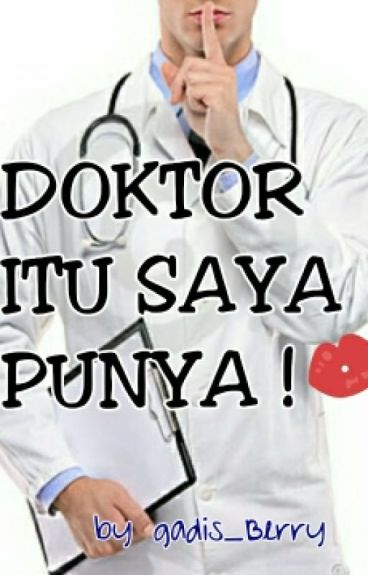

Age: 30
Gender: Man
Race: white
Emotion:surprise


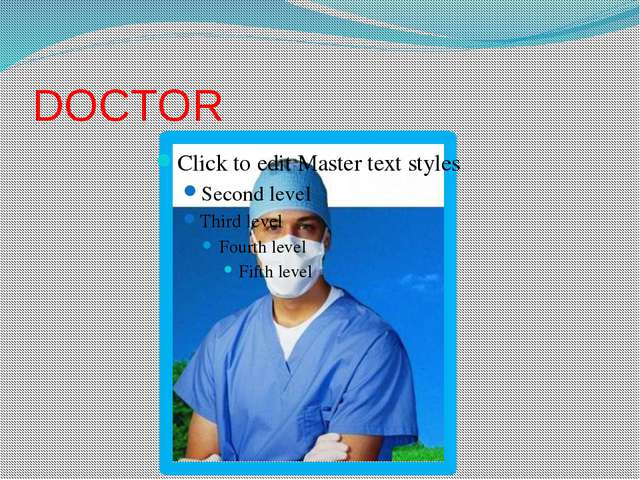

Age: 36
Gender: Man
Race: white
Emotion:angry


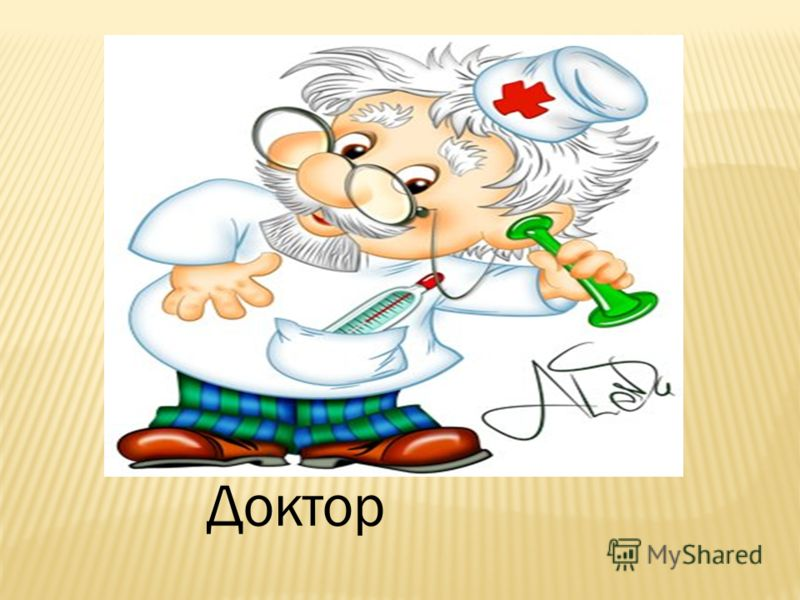

Age: 37
Gender: Man
Race: white
Emotion:surprise


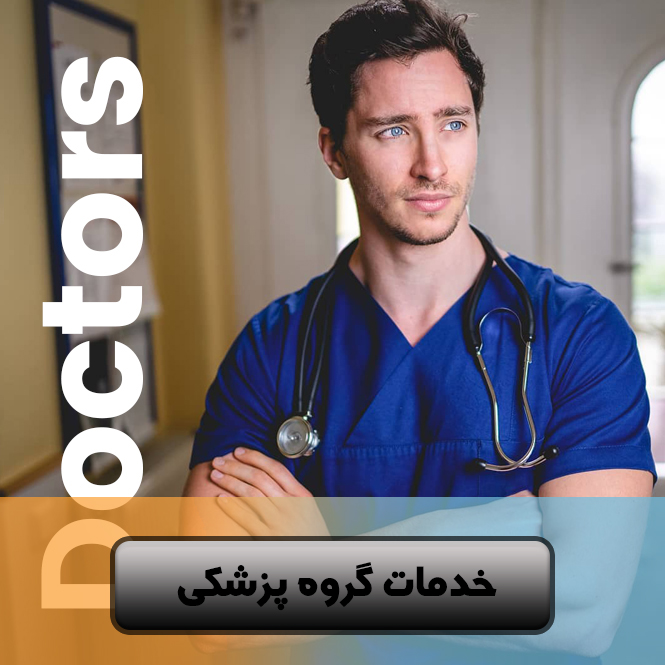

Age: 33
Gender: Man
Race: white
Emotion:angry


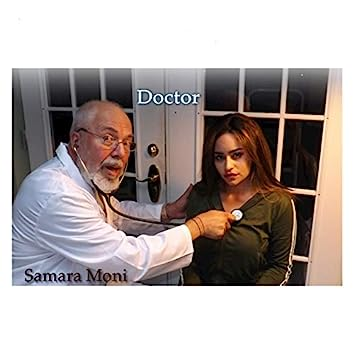

Age: 23
Gender: Woman
Race: middle eastern
Emotion:neutral


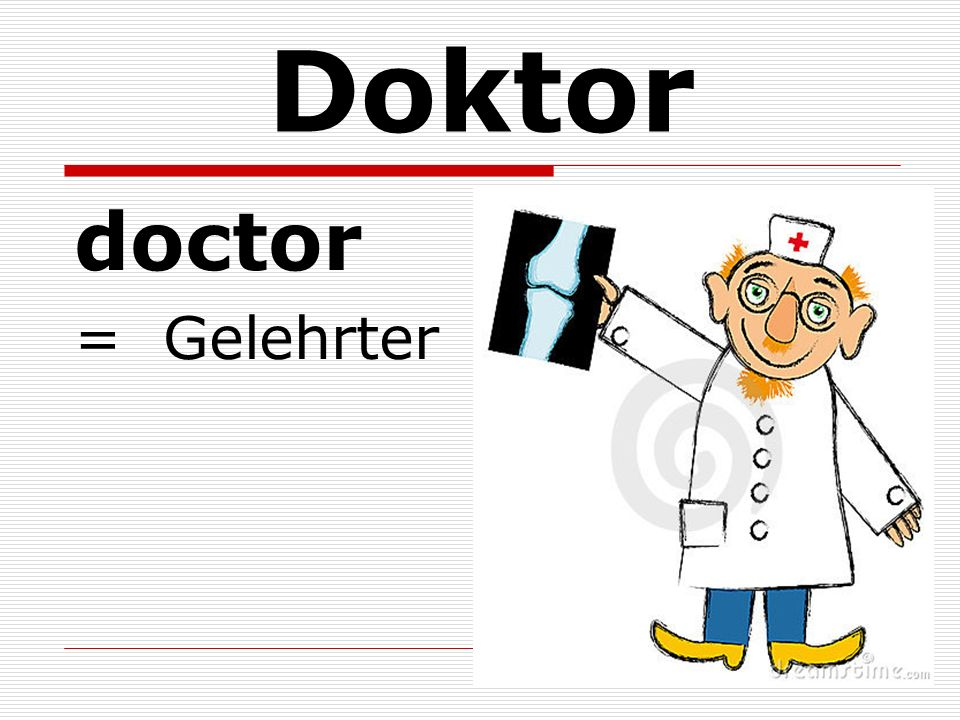

Age: 36
Gender: Man
Race: white
Emotion:neutral


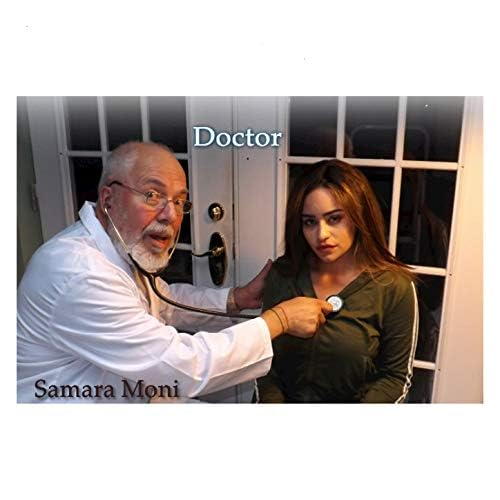

Age: 22
Gender: Woman
Race: middle eastern
Emotion:sad


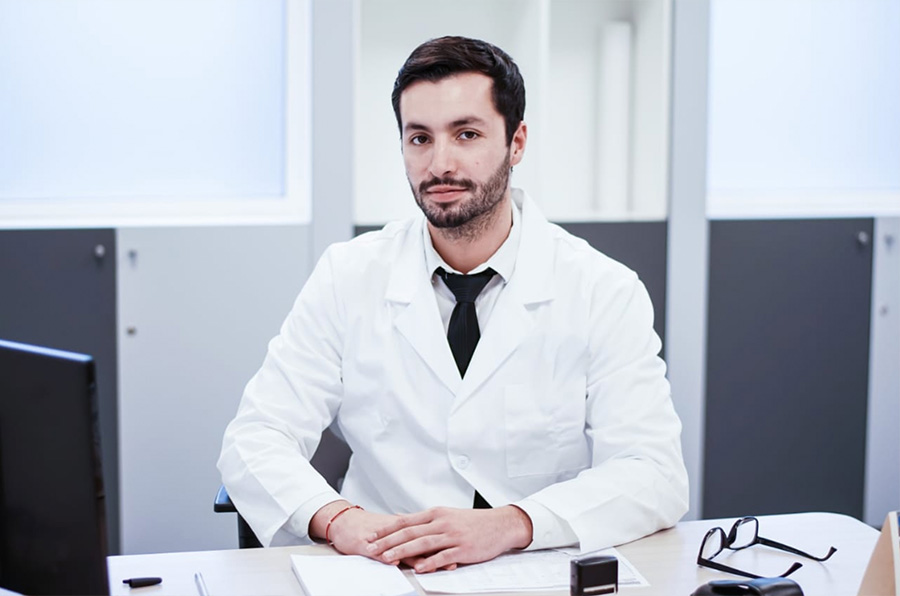

Age: 29
Gender: Man
Race: latino hispanic
Emotion:neutral


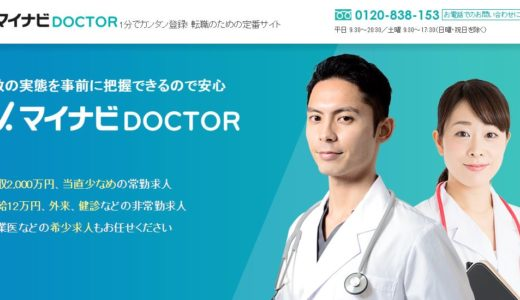

Age: 32
Gender: Man
Race: asian
Emotion:neutral


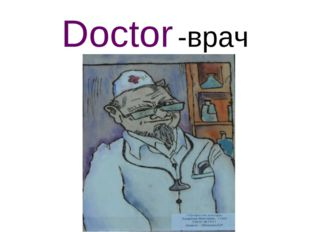

Age: 38
Gender: Man
Race: white
Emotion:sad


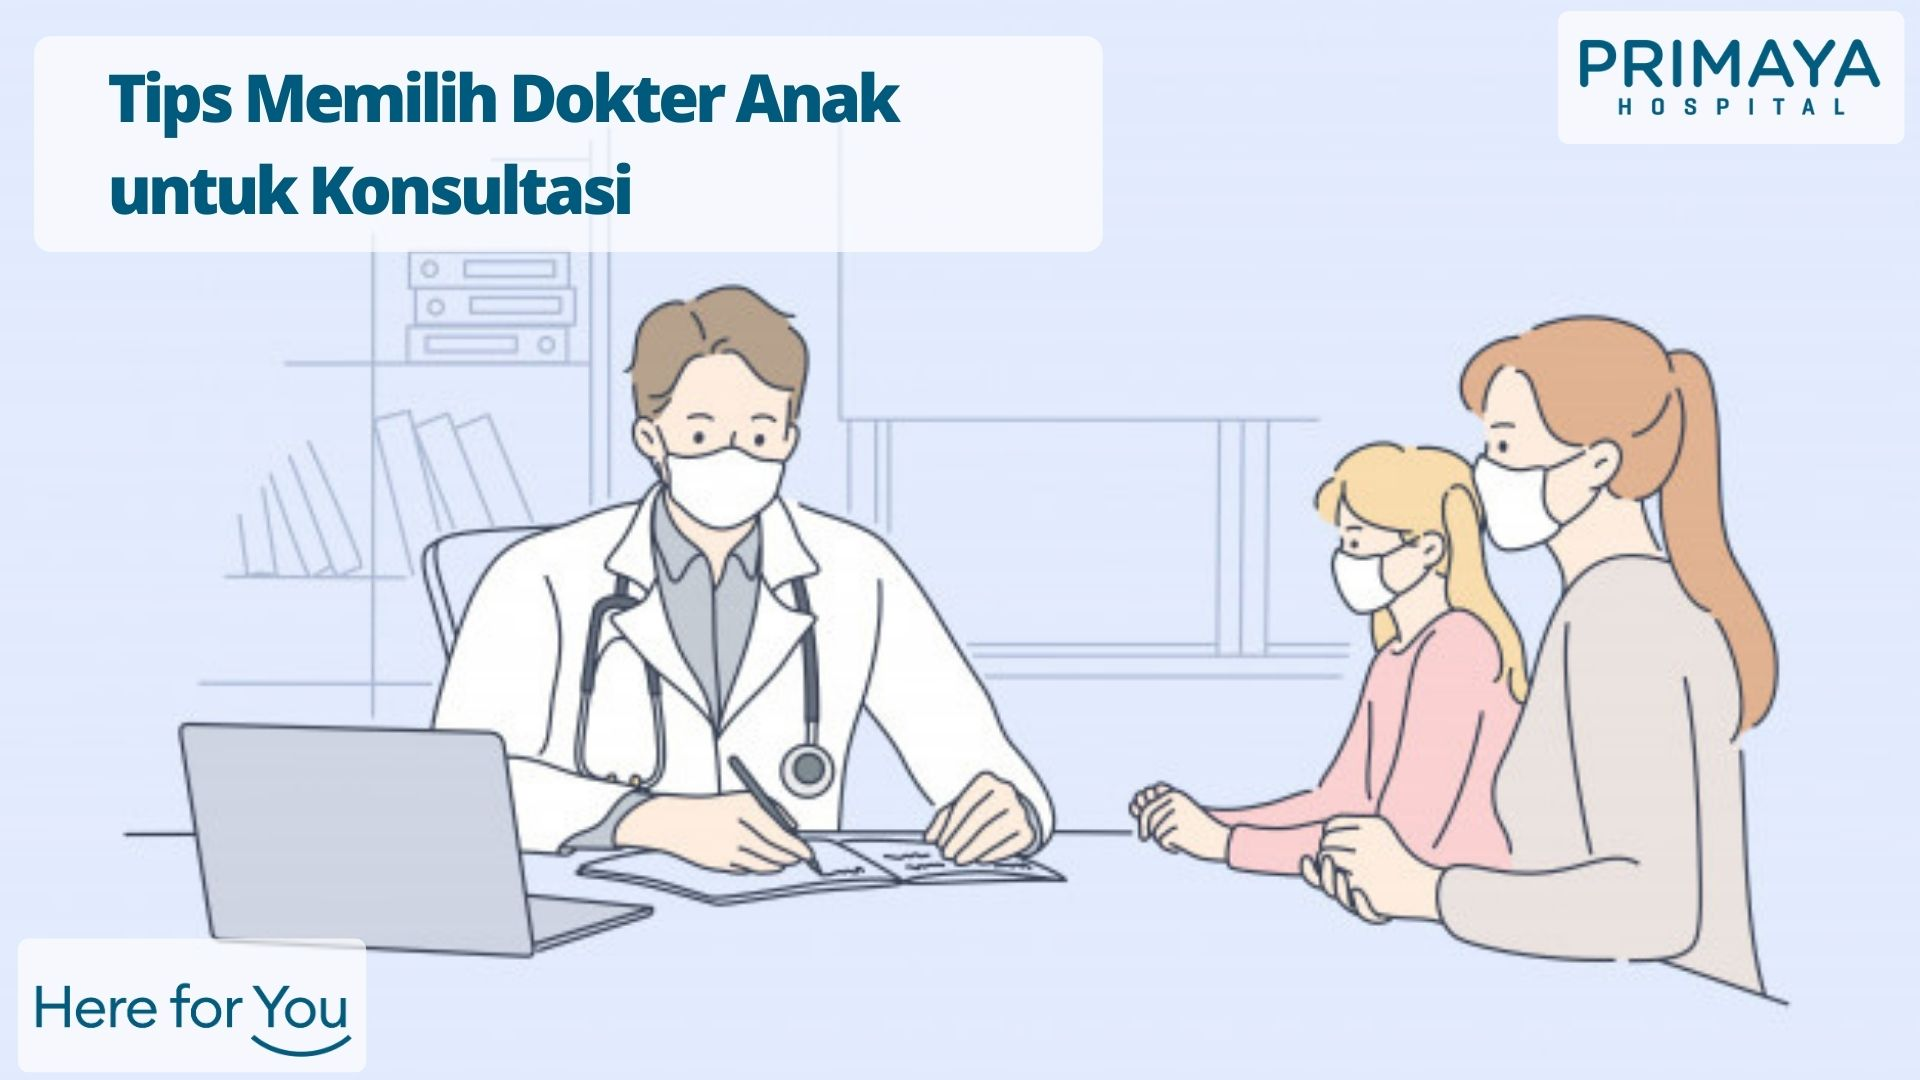

Age: 40
Gender: Man
Race: white
Emotion:sad


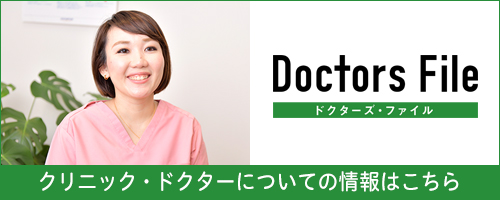

Age: 23
Gender: Woman
Race: asian
Emotion:happy


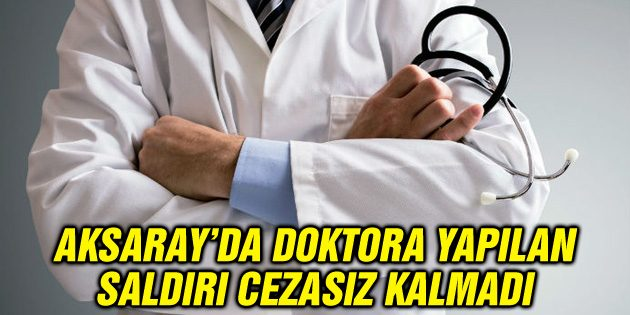

Age: 38
Gender: Man
Race: white
Emotion:happy


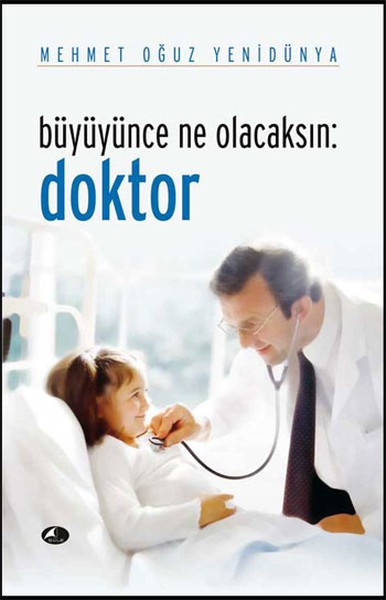

Age: 24
Gender: Man
Race: white
Emotion:happy


In [49]:
ImageInfoDisplay(DeepFaceDict)